<a href="https://colab.research.google.com/github/ENRICOROBLESDELRIO/data_boot_camp_final_project/blob/cgzverduzco_branch/NeuralNetwork_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import data**

In [2]:
# Libraries and dependencies

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import math
from sklearn.metrics import accuracy_score
from google.colab import files
from sqlalchemy import create_engine
import psycopg2

## Import for models
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import train_test_split
import re
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from collections import Counter
import itertools

# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import tensorflow as tf
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [3]:
# Google Cloud SQL connexion:
# Code taken from: https://stackoverflow.com/questions/53180140/how-to-access-cloud-sql-from-google-colab
!gcloud auth login
!gcloud config set project endeavor-intelligence-unit
!gcloud sql instances describe finalprojectdb


Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&state=XzzPTlPXQkW1QFYOVsDahfqZRJjLhP&prompt=consent&access_type=offline&code_challenge=_bYMe25SiS6SLWAOzhHvChDi5fX3k_MbffZh9N8O9dg&code_challenge_method=S256

Enter verification code: 4/1AX4XfWj2zhMSCWmhmeEeHlp404Or10shq8m9lAH8RiL0hZkjuOagivK29XM

You are now logged in as [c.gzverduzco@gmail.com].
Your current project is [None].  You can change this setting by running:
  $ gcloud config set project PROJECT_ID
Updated property [core/project].
ERROR: (gcloud.sql.instances.describe) There was no ins

In [4]:
# download and initialize the psql proxy
!wget https://dl.google.com/cloudsql/cloud_sql_proxy.linux.amd64 -O cloud_sql_proxy
!chmod +x cloud_sql_proxy

# "connectionName" is from the previous block
!nohup ./cloud_sql_proxy -instances="endeavor-intelligence-unit:northamerica-northeast2:finalprojectdb"=tcp:5432 &
!sleep 30s

--2021-11-24 17:30:58--  https://dl.google.com/cloudsql/cloud_sql_proxy.linux.amd64
Resolving dl.google.com (dl.google.com)... 108.177.111.190, 108.177.111.93, 108.177.111.136, ...
Connecting to dl.google.com (dl.google.com)|108.177.111.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16638816 (16M) [application/octet-stream]
Saving to: ‘cloud_sql_proxy’

cloud_sql_proxy     100%[===================>]  15.87M  --.-KB/s    in 0.07s   

2021-11-24 17:30:58 (237 MB/s) - ‘cloud_sql_proxy’ saved [16638816/16638816]

nohup: appending output to 'nohup.out'


In [5]:
#Checking the proxy´s logs 
!cat nohup.out

2021/11/24 17:30:59 current FDs rlimit set to 1048576, wanted limit is 8500. Nothing to do here.
2021/11/24 17:31:00 errors parsing config:
	googleapi: Error 403: The client is not authorized to make this request., notAuthorized


In [6]:
# Connexion throught psycopg2 Google Cloud SQL data base
conn = psycopg2.connect(
    host='****', port='****', database="****",
    user="****", password="****")

#Rounds

In [ ]:
# Query to connect with SQL data base
SQL_Query = pd.read_sql_query('''select * FROM "Rounds" ''', conn)
rounds_df = pd.DataFrame(SQL_Query)

In [ ]:
# Data base of VC Rounds in entrepreneurs 
rounds_df.head(20)

,id_company,category,deal_type,foundation_year,number_employees,increase_employees,number_investors,current_status,foreign_vc,local_vc,round_year,round_amount,support_company,manufacture_equipment,develop_new_tech,grow_company,add_new_services,develop_business,financial_banking,develop_products_services,marketing_strategies,expand_internationality,consolidate_company,increase_team
0,3,E-Commerce,Seed,2017,33.0,8,3,1,0,1,2017,1400000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,SaaS,Seed,2018,10.0,0,2,0,0,1,2018,10500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10,SaaS,Angel,2015,11.0,14,1,1,0,1,2015,200000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13,IT services,Seed,2016,10.0,0,1,0,0,1,2016,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23,E-Commerce,Seed,2013,1001.0,0,1,1,1,0,2013,150000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,23,E-Commerce,Seed,2020,1001.0,0,3,1,1,0,2020,2500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,23,E-Commerce,Seed,2020,1001.0,0,4,1,1,0,2020,150000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,23,E-Commerce,Series A,2020,1001.0,0,0,1,0,0,2020,12000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,23,E-Commerce,Series B,2021,1001.0,0,2,1,1,0,2021,40000000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,33,SaaS,Accelerator/Incubator,2013,6.0,0,1,1,1,0,2013,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# data types
rounds_df.dtypes

id_company                     int64
category                      object
deal_type                     object
foundation_year                int64
number_employees             float64
increase_employees             int64
number_investors               int64
current_status                 int64
foreign_vc                     int64
local_vc                       int64
round_year                     int64
round_amount                 float64
support_company              float64
manufacture_equipment        float64
develop_new_tech             float64
grow_company                 float64
add_new_services             float64
develop_business             float64
financial_banking            float64
develop_products_services    float64
marketing_strategies         float64
expand_internationality      float64
consolidate_company          float64
increase_team                float64
dtype: object

In [ ]:
rounds_df.isna().sum()

id_company                   0
category                     0
deal_type                    0
foundation_year              0
number_employees             7
increase_employees           0
number_investors             0
current_status               0
foreign_vc                   0
local_vc                     0
round_year                   0
round_amount                 0
support_company              5
manufacture_equipment        5
develop_new_tech             5
grow_company                 5
add_new_services             5
develop_business             5
financial_banking            5
develop_products_services    5
marketing_strategies         5
expand_internationality      5
consolidate_company          5
increase_team                5
dtype: int64

In [ ]:
rounds_df[rounds_df['current_status'].isnull()]


,id_company,category,deal_type,foundation_year,number_employees,increase_employees,number_investors,current_status,foreign_vc,local_vc,round_year,round_amount,support_company,manufacture_equipment,develop_new_tech,grow_company,add_new_services,develop_business,financial_banking,develop_products_services,marketing_strategies,expand_internationality,consolidate_company,increase_team


In [ ]:
rounds_df.count()

id_company                   1236
category                     1236
deal_type                    1236
foundation_year              1236
number_employees             1229
increase_employees           1236
number_investors             1236
current_status               1236
foreign_vc                   1236
local_vc                     1236
round_year                   1236
round_amount                 1236
support_company              1231
manufacture_equipment        1231
develop_new_tech             1231
grow_company                 1231
add_new_services             1231
develop_business             1231
financial_banking            1231
develop_products_services    1231
marketing_strategies         1231
expand_internationality      1231
consolidate_company          1231
increase_team                1231
dtype: int64

In [ ]:
len(rounds_df.axes[0])

1236

In [ ]:
# Drop the null columns where all values are null
rounds_df = rounds_df.dropna(axis='columns', how='all')
rounds_df.head()

,id_company,category,deal_type,foundation_year,number_employees,increase_employees,number_investors,current_status,foreign_vc,local_vc,round_year,round_amount,support_company,manufacture_equipment,develop_new_tech,grow_company,add_new_services,develop_business,financial_banking,develop_products_services,marketing_strategies,expand_internationality,consolidate_company,increase_team
0,3,E-Commerce,Seed,2017,33.0,8,3,1,0,1,2017,1400000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,SaaS,Seed,2018,10.0,0,2,0,0,1,2018,10500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10,SaaS,Angel,2015,11.0,14,1,1,0,1,2015,200000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13,IT services,Seed,2016,10.0,0,1,0,0,1,2016,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23,E-Commerce,Seed,2013,1001.0,0,1,1,1,0,2013,150000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Encoding labels
le = LabelEncoder()
db_rounds_Encode = rounds_df.copy()
db_rounds_Encode['deal_type'] = le.fit_transform(db_rounds_Encode['deal_type'])

# Get the name of the columns
columnsName = db_rounds_Encode.columns.tolist()
#columnsName.remove('rounds_funding_factor')

# convert variables to numerical
for column in columnsName:
  db_rounds_Encode[column] = pd.to_numeric(db_rounds_Encode[column], errors='coerce').fillna(0).astype(np.int64)

db_rounds_Encode.head()

,id_company,category,deal_type,foundation_year,number_employees,increase_employees,number_investors,current_status,foreign_vc,local_vc,round_year,round_amount,support_company,manufacture_equipment,develop_new_tech,grow_company,add_new_services,develop_business,financial_banking,develop_products_services,marketing_strategies,expand_internationality,consolidate_company,increase_team
0,3,0,10,2017,33,8,3,1,0,1,2017,1400000,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,10,2018,10,0,2,0,0,1,2018,10500,0,0,0,0,0,0,0,0,0,0,0,0
2,10,0,1,2015,11,14,1,1,0,1,2015,200000,0,0,0,0,0,0,0,0,0,0,0,0
3,13,0,10,2016,10,0,1,0,0,1,2016,50000,0,0,0,0,0,0,0,0,0,0,0,0
4,23,0,10,2013,1001,0,1,1,1,0,2013,150000,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# data types
db_rounds_Encode.dtypes

id_company                   int64
category                     int64
deal_type                    int64
foundation_year              int64
number_employees             int64
increase_employees           int64
number_investors             int64
current_status               int64
foreign_vc                   int64
local_vc                     int64
round_year                   int64
round_amount                 int64
support_company              int64
manufacture_equipment        int64
develop_new_tech             int64
grow_company                 int64
add_new_services             int64
develop_business             int64
financial_banking            int64
develop_products_services    int64
marketing_strategies         int64
expand_internationality      int64
consolidate_company          int64
increase_team                int64
dtype: object

In [ ]:
db_rounds_Encode.isna().sum()

id_company                   0
category                     0
deal_type                    0
foundation_year              0
number_employees             0
increase_employees           0
number_investors             0
current_status               0
foreign_vc                   0
local_vc                     0
round_year                   0
round_amount                 0
support_company              0
manufacture_equipment        0
develop_new_tech             0
grow_company                 0
add_new_services             0
develop_business             0
financial_banking            0
develop_products_services    0
marketing_strategies         0
expand_internationality      0
consolidate_company          0
increase_team                0
dtype: int64

In [ ]:
db_rounds_Encode.count()

id_company                   1236
category                     1236
deal_type                    1236
foundation_year              1236
number_employees             1236
increase_employees           1236
number_investors             1236
current_status               1236
foreign_vc                   1236
local_vc                     1236
round_year                   1236
round_amount                 1236
support_company              1236
manufacture_equipment        1236
develop_new_tech             1236
grow_company                 1236
add_new_services             1236
develop_business             1236
financial_banking            1236
develop_products_services    1236
marketing_strategies         1236
expand_internationality      1236
consolidate_company          1236
increase_team                1236
dtype: int64

#FOUNDERS

In [ ]:
# Query to connect with SQL data base from Founders Demographics 
SQL_Query = pd.read_sql_query('''select * FROM "Founders" ''', conn)
founders_df = pd.DataFrame(SQL_Query)

In [ ]:
# Data base of Founders Demographics  
founders_df.head(20)

,id_founder,id_company,general_location,manager_exp,clevel_exp,engineering_exp,sales_exp,finance_exp,human_capital_exp,consulting_exp,founder_exp,foundation_year,years_of_experience_as_entreprenuer,age_of_first_entrepreneurship,age,years_of_experience,number_of_startups,gender,foreing_studies,foreing_work_experience,foreing_founder
0,1,7,"Ciudad de México, México",1,1,0,0,0,0,0,1.0,2020.0,12.0,31.0,32.0,13.0,4,M,0,0,0
1,2,23,"Ciudad de México, México",0,1,0,0,0,0,0,1.0,2014.0,4.0,25.0,32.0,11.0,2,M,0,0,0
2,3,141,México,0,1,0,0,0,0,0,0.0,2015.0,0.0,22.0,28.0,6.0,1,M,0,1,0
3,4,152,"Ciudad de México, México",0,0,0,0,1,0,1,1.0,2017.0,6.0,28.0,32.0,10.0,3,M,1,1,1
4,5,155,México,1,1,0,0,0,0,0,0.0,2015.0,10.0,27.0,33.0,16.0,1,M,1,0,0
5,6,167,None,0,1,0,0,0,0,0,1.0,2003.0,0.0,NaN,41.0,18.0,1,M,0,0,0
6,7,185,"Ciudad de México, México",0,0,0,0,0,0,0,1.0,2021.0,20.0,41.0,41.0,20.0,4,M,1,0,0
7,8,233,"Ciudad de México, México",1,1,0,0,0,0,1,1.0,2016.0,13.0,34.0,39.0,18.0,2,F,0,1,1
8,9,1799,None,1,1,1,0,0,0,0,1.0,2013.0,25.0,54.0,62.0,33.0,1,M,0,1,0
9,10,284,"Ciudad de México, México",0,0,0,0,1,0,0,1.0,2016.0,2.0,24.0,29.0,7.0,1,M,0,0,0


In [ ]:
# data types
founders_df.dtypes

id_founder                               int64
id_company                               int64
general_location                        object
manager_exp                              int64
clevel_exp                               int64
engineering_exp                          int64
sales_exp                                int64
finance_exp                              int64
human_capital_exp                        int64
consulting_exp                           int64
founder_exp                            float64
foundation_year                        float64
years_of_experience_as_entreprenuer    float64
age_of_first_entrepreneurship          float64
age                                    float64
years_of_experience                    float64
number_of_startups                       int64
gender                                  object
foreing_studies                          int64
foreing_work_experience                  int64
foreing_founder                          int64
dtype: object

In [ ]:
founders_df.isna().sum()

id_founder                              0
id_company                              0
general_location                       11
manager_exp                             0
clevel_exp                              0
engineering_exp                         0
sales_exp                               0
finance_exp                             0
human_capital_exp                       0
consulting_exp                          0
founder_exp                             1
foundation_year                         7
years_of_experience_as_entreprenuer     7
age_of_first_entrepreneurship          74
age                                     6
years_of_experience                     6
number_of_startups                      0
gender                                  0
foreing_studies                         0
foreing_work_experience                 0
foreing_founder                         0
dtype: int64

In [ ]:
founders_df.count()


id_founder                             640
id_company                             640
general_location                       629
manager_exp                            640
clevel_exp                             640
engineering_exp                        640
sales_exp                              640
finance_exp                            640
human_capital_exp                      640
consulting_exp                         640
founder_exp                            639
foundation_year                        633
years_of_experience_as_entreprenuer    633
age_of_first_entrepreneurship          566
age                                    634
years_of_experience                    634
number_of_startups                     640
gender                                 640
foreing_studies                        640
foreing_work_experience                640
foreing_founder                        640
dtype: int64

In [ ]:
# Drop the null columns where all values are null
founders_df = founders_df.dropna(axis='columns', how='all')
founders_df.head()

,id_founder,id_company,general_location,manager_exp,clevel_exp,engineering_exp,sales_exp,finance_exp,human_capital_exp,consulting_exp,founder_exp,foundation_year,years_of_experience_as_entreprenuer,age_of_first_entrepreneurship,age,years_of_experience,number_of_startups,gender,foreing_studies,foreing_work_experience,foreing_founder
0,1,7,"Ciudad de México, México",1,1,0,0,0,0,0,1.0,2020.0,12.0,31.0,32.0,13.0,4,M,0,0,0
1,2,23,"Ciudad de México, México",0,1,0,0,0,0,0,1.0,2014.0,4.0,25.0,32.0,11.0,2,M,0,0,0
2,3,141,México,0,1,0,0,0,0,0,0.0,2015.0,0.0,22.0,28.0,6.0,1,M,0,1,0
3,4,152,"Ciudad de México, México",0,0,0,0,1,0,1,1.0,2017.0,6.0,28.0,32.0,10.0,3,M,1,1,1
4,5,155,México,1,1,0,0,0,0,0,0.0,2015.0,10.0,27.0,33.0,16.0,1,M,1,0,0


In [ ]:
# Encoding labels
le = LabelEncoder()
db_founders_Encode = founders_df.copy()
db_founders_Encode['general_location'] = db_founders_Encode['general_location'].fillna("nan", inplace = True) # Aqui Luis
db_founders_Encode['general_location'] = le.fit_transform(db_founders_Encode['general_location'])
db_founders_Encode['gender'] = le.fit_transform(db_founders_Encode['gender'])
#db_founders_Encode['category'] = le.fit_transform(db_founders_Encode['category'])

# Get the name of the columns
columnsName = db_founders_Encode.columns.tolist()

# convert variables to numerical
for column in columnsName:
  db_founders_Encode[column] = pd.to_numeric(db_founders_Encode[column], errors='coerce').fillna(0).astype(np.int64)

db_founders_Encode.head()

,id_founder,id_company,general_location,manager_exp,clevel_exp,engineering_exp,sales_exp,finance_exp,human_capital_exp,consulting_exp,founder_exp,foundation_year,years_of_experience_as_entreprenuer,age_of_first_entrepreneurship,age,years_of_experience,number_of_startups,gender,foreing_studies,foreing_work_experience,foreing_founder
0,1,7,0,1,1,0,0,0,0,0,1,2020,12,31,32,13,4,1,0,0,0
1,2,23,0,0,1,0,0,0,0,0,1,2014,4,25,32,11,2,1,0,0,0
2,3,141,0,0,1,0,0,0,0,0,0,2015,0,22,28,6,1,1,0,1,0
3,4,152,0,0,0,0,0,1,0,1,1,2017,6,28,32,10,3,1,1,1,1
4,5,155,0,1,1,0,0,0,0,0,0,2015,10,27,33,16,1,1,1,0,0


In [ ]:
# data types
db_founders_Encode.dtypes

id_founder                             int64
id_company                             int64
general_location                       int64
manager_exp                            int64
clevel_exp                             int64
engineering_exp                        int64
sales_exp                              int64
finance_exp                            int64
human_capital_exp                      int64
consulting_exp                         int64
founder_exp                            int64
foundation_year                        int64
years_of_experience_as_entreprenuer    int64
age_of_first_entrepreneurship          int64
age                                    int64
years_of_experience                    int64
number_of_startups                     int64
gender                                 int64
foreing_studies                        int64
foreing_work_experience                int64
foreing_founder                        int64
dtype: object

In [ ]:
db_founders_Encode.isna().sum()

id_founder                             0
id_company                             0
general_location                       0
manager_exp                            0
clevel_exp                             0
engineering_exp                        0
sales_exp                              0
finance_exp                            0
human_capital_exp                      0
consulting_exp                         0
founder_exp                            0
foundation_year                        0
years_of_experience_as_entreprenuer    0
age_of_first_entrepreneurship          0
age                                    0
years_of_experience                    0
number_of_startups                     0
gender                                 0
foreing_studies                        0
foreing_work_experience                0
foreing_founder                        0
dtype: int64

In [ ]:
db_founders_Encode.count()

id_founder                             640
id_company                             640
general_location                       640
manager_exp                            640
clevel_exp                             640
engineering_exp                        640
sales_exp                              640
finance_exp                            640
human_capital_exp                      640
consulting_exp                         640
founder_exp                            640
foundation_year                        640
years_of_experience_as_entreprenuer    640
age_of_first_entrepreneurship          640
age                                    640
years_of_experience                    640
number_of_startups                     640
gender                                 640
foreing_studies                        640
foreing_work_experience                640
foreing_founder                        640
dtype: int64

#Companies

In [12]:
# Query to connect with SQL data base
SQL_Query = pd.read_sql_query('''select * FROM "companies" ''', conn)
companies_df = pd.DataFrame(SQL_Query)

# Drop the null columns where all values are null
companies_df = companies_df.dropna(axis='columns', how='all')

companies_df

,id_company,foundation_year,category,first_r_year,first_r_amount,last_funding_year,amount_last_funding,month_since_last_funding,number_employees,increase_employees,number_investors,current_status,rounds_funding_factor,soonicorn,more50_employees,more100_employees,dp_year,dp_rounds_count,dp_rounds_amount_sum,dp_rounds_amount_max,dp_last_round_year,dp_last_round_amount,dp_years_operating,max_manager_exp,max_clevel_exp,max_engineering_exp,max_sales_exp,max_finance_exp,max_human_capital_exp,max_consulting_exp,max_founder_exp,max_number_of_startups,max_gender,max_foreing_studies,max_foreing_work_experience,max_foreing_founder,max_dp_years_of_experience,max_dp_years_of_experience_as_entreprenuer,sum_manager_exp,sum_clevel_exp,sum_engineering_exp,sum_sales_exp,sum_finance_exp,sum_human_capital_exp,sum_consulting_exp,sum_founder_exp,sum_number_of_startups,sum_gender,sum_foreing_studies,sum_foreing_work_experience,sum_foreing_founder,sum_dp_years_of_experience,sum_dp_years_of_experience_as_entreprenuer,mean_manager_exp,mean_clevel_exp,mean_engineering_exp,mean_sales_exp,mean_finance_exp,mean_human_capital_exp,mean_consulting_exp,mean_founder_exp,mean_number_of_startups,mean_gender,mean_foreing_studies,mean_foreing_work_experience,mean_foreing_founder,mean_dp_years_of_experience,mean_dp_years_of_experience_as_entreprenuer
0,3.0,2017.0,0.0,2017.0,1400000.0,2017.0,1400000.0,48.0,33.0,8.0,3.0,1.0,4.0,0.0,0.0,0.0,2017.0,1.0,1400000.0,1400000.0,2017.0,1400000.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,0.0,0.0,12.0,8.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,2.0,1.0,0.0,0.0,22.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,11.0,7.0
1,7.0,2018.0,0.0,2018.0,10500.0,2018.0,10500.0,36.0,10.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,2018.0,1.0,10500.0,10500.0,2018.0,10500.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,0.0,0.0,0.0,10.0,9.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,0.0,0.0,0.0,10.0,9.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,0.0,0.0,0.0,10.0,9.0
2,10.0,2015.0,0.0,2015.0,200000.0,2015.0,200000.0,72.0,11.0,14.0,1.0,1.0,6.0,0.0,0.0,0.0,2015.0,1.0,200000.0,200000.0,2015.0,200000.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,12.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,12.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,12.0,2.0
3,23.0,2013.0,0.0,2013.0,150000.0,2021.0,40000000.0,0.0,1001.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2021.0,5.0,54800000.0,40000000.0,2021.0,40000000.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,11.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,11.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,11.0,4.0
4,51.0,2018.0,0.0,2018.0,20000.0,2018.0,20000.0,36.0,10.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,2018.0,1.0,20000.0,20000.0,2018.0,20000.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,4429.0,2018.0,0.0,2018.0,750000.0,2021.0,3100000.0,0.0,259.0,249.0,0.0,1.0,0.0,0.0,1.0,1.0,2021.0,4.0,12510000.0,4960000.0,2021.0,3100000.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,12.0,11.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,12.0,11.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,12.0,11.0
506,4433.0,2021.0,0.0,2021.0,225000000.0,2021.0,225000000.0,0.0,125.0,124.0,2.0,1.0,0.0,1.0,1.0,1.0,2021.0,1.0,225000000.0,225000000.0,2021.0,225000000.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,9.0,8.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,9.0,8.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,9.0,8.0
507,4434.0,2021.0,0.0,2021.0,130000.0,2021.0,130000.0,0.0,11.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2021.0,1.0,130000.0,130000.

In [10]:


# Encoding labels
le = LabelEncoder()
db_companies_Encode = companies_df.copy()

# Get the name of the columns
columnsName = db_companies_Encode.columns.tolist()
columnsName.remove('rounds_funding_factor')
r = re.compile("^mean")
columnsName = [column for column in columnsName if not r.match(column)]

# convert variables to numerical
for column in columnsName:
  db_companies_Encode[column] = pd.to_numeric(db_companies_Encode[column], errors='coerce').fillna(0).astype(np.int64)


In [11]:
db_companies_Encode

,id_company,foundation_year,category,first_r_year,first_r_amount,last_funding_year,amount_last_funding,month_since_last_funding,number_employees,increase_employees,number_investors,current_status,rounds_funding_factor,soonicorn,more50_employees,more100_employees,dp_year,dp_rounds_count,dp_rounds_amount_sum,dp_rounds_amount_max,dp_last_round_year,dp_last_round_amount,dp_years_operating,max_manager_exp,max_clevel_exp,max_engineering_exp,max_sales_exp,max_finance_exp,max_human_capital_exp,max_consulting_exp,max_founder_exp,max_number_of_startups,max_gender,max_foreing_studies,max_foreing_work_experience,max_foreing_founder,max_dp_years_of_experience,max_dp_years_of_experience_as_entreprenuer,sum_manager_exp,sum_clevel_exp,sum_engineering_exp,sum_sales_exp,sum_finance_exp,sum_human_capital_exp,sum_consulting_exp,sum_founder_exp,sum_number_of_startups,sum_gender,sum_foreing_studies,sum_foreing_work_experience,sum_foreing_founder,sum_dp_years_of_experience,sum_dp_years_of_experience_as_entreprenuer,mean_manager_exp,mean_clevel_exp,mean_engineering_exp,mean_sales_exp,mean_finance_exp,mean_human_capital_exp,mean_consulting_exp,mean_founder_exp,mean_number_of_startups,mean_gender,mean_foreing_studies,mean_foreing_work_experience,mean_foreing_founder,mean_dp_years_of_experience,mean_dp_years_of_experience_as_entreprenuer
0,3,2017,0,2017,1400000,2017,1400000,48,33,8,3,1,4.0,0,0,0,2017,1,1400000,1400000,2017,1400000,0,1,1,0,0,0,0,0,1,3,1,1,0,0,12,8,1,1,0,0,0,0,0,2,4,2,1,0,0,22,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,11.0,7.0
1,7,2018,0,2018,10500,2018,10500,36,10,0,2,0,3.0,0,0,0,2018,1,10500,10500,2018,10500,0,1,1,0,0,0,0,0,1,4,1,0,0,0,10,9,1,1,0,0,0,0,0,1,4,1,0,0,0,10,9,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,0.0,0.0,0.0,10.0,9.0
2,10,2015,0,2015,200000,2015,200000,72,11,14,1,1,6.0,0,0,0,2015,1,200000,200000,2015,200000,0,1,1,0,0,0,0,0,1,1,1,0,0,0,12,2,1,1,0,0,0,0,0,1,1,1,0,0,0,12,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,12.0,2.0
3,23,2013,0,2013,150000,2021,40000000,0,1001,0,0,1,0.0,1,1,1,2021,5,54800000,40000000,2021,40000000,8,0,1,0,0,0,0,0,1,2,1,0,0,0,11,4,0,1,0,0,0,0,0,1,2,1,0,0,0,11,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,11.0,4.0
4,51,2018,0,2018,20000,2018,20000,36,10,0,1,0,3.0,0,0,0,2018,1,20000,20000,2018,20000,0,0,1,1,0,0,0,0,0,1,1,1,0,0,5,0,0,1,1,0,0,0,0,0,1,1,1,0,0,5,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,4429,2018,0,2018,750000,2021,3100000,0,259,249,0,1,0.0,0,1,1,2021,4,12510000,4960000,2021,3100000,3,1,1,0,1,0,0,1,1,1,1,1,1,0,12,11,1,1,0,1,0,0,1,1,1,1,1,1,0,12,11,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,12.0,11.0
506,4433,2021,0,2021,225000000,2021,225000000,0,125,124,2,1,0.0,1,1,1,2021,1,225000000,225000000,2021,225000000,0,0,1,0,0,1,0,1,1,1,1,1,0,1,9,8,0,1,0,0,1,0,1,1,1,1,1,0,1,9,8,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,9.0,8.0
507,4434,2021,0,2021,130000,2021,130000,0,11,0,1,1,0.0,0,0,0,2021,1,130000,130000,2021,130000,0,0,0,1,0,0,0,0,1,2,1,1,0,0,6,4,0,0,1,0,0,0,0,1,2,1,1,0,0,6,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,6.0,4.0
508,4435,2021,0,2021,130000,2021,130000,0,9,0,1,1,0.0,0,0,0,2021,1,130000,130000,2021,130000,0,0,0,0,0,0,0,0,1,2,1,1,0,0,3,3,0,0,0,0,0,0,0,1,2,1,1,0,0,3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,3.0,3.0


In [8]:
db_companies_Encode.loc[db_companies_Encode['id_company'] == 2233.0]

,id_company,foundation_year,category,first_r_year,first_r_amount,last_funding_year,amount_last_funding,month_since_last_funding,number_employees,increase_employees,number_investors,current_status,rounds_funding_factor,soonicorn,more50_employees,more100_employees,dp_year,dp_rounds_count,dp_rounds_amount_sum,dp_rounds_amount_max,dp_last_round_year,dp_last_round_amount,dp_years_operating,max_manager_exp,max_clevel_exp,max_engineering_exp,max_sales_exp,max_finance_exp,max_human_capital_exp,max_consulting_exp,max_founder_exp,max_number_of_startups,max_gender,max_foreing_studies,max_foreing_work_experience,max_foreing_founder,max_dp_years_of_experience,max_dp_years_of_experience_as_entreprenuer,sum_manager_exp,sum_clevel_exp,sum_engineering_exp,sum_sales_exp,sum_finance_exp,sum_human_capital_exp,sum_consulting_exp,sum_founder_exp,sum_number_of_startups,sum_gender,sum_foreing_studies,sum_foreing_work_experience,sum_foreing_founder,sum_dp_years_of_experience,sum_dp_years_of_experience_as_entreprenuer,mean_manager_exp,mean_clevel_exp,mean_engineering_exp,mean_sales_exp,mean_finance_exp,mean_human_capital_exp,mean_consulting_exp,mean_founder_exp,mean_number_of_startups,mean_gender,mean_foreing_studies,mean_foreing_work_experience,mean_foreing_founder,mean_dp_years_of_experience,mean_dp_years_of_experience_as_entreprenuer
240,2233,2014,0,2014,500000000,2018,300000000,36,1596,81,1,1,0.0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


In [9]:
db_companies_Encode

,id_company,foundation_year,category,first_r_year,first_r_amount,last_funding_year,amount_last_funding,month_since_last_funding,number_employees,increase_employees,number_investors,current_status,rounds_funding_factor,soonicorn,more50_employees,more100_employees,dp_year,dp_rounds_count,dp_rounds_amount_sum,dp_rounds_amount_max,dp_last_round_year,dp_last_round_amount,dp_years_operating,max_manager_exp,max_clevel_exp,max_engineering_exp,max_sales_exp,max_finance_exp,max_human_capital_exp,max_consulting_exp,max_founder_exp,max_number_of_startups,max_gender,max_foreing_studies,max_foreing_work_experience,max_foreing_founder,max_dp_years_of_experience,max_dp_years_of_experience_as_entreprenuer,sum_manager_exp,sum_clevel_exp,sum_engineering_exp,sum_sales_exp,sum_finance_exp,sum_human_capital_exp,sum_consulting_exp,sum_founder_exp,sum_number_of_startups,sum_gender,sum_foreing_studies,sum_foreing_work_experience,sum_foreing_founder,sum_dp_years_of_experience,sum_dp_years_of_experience_as_entreprenuer,mean_manager_exp,mean_clevel_exp,mean_engineering_exp,mean_sales_exp,mean_finance_exp,mean_human_capital_exp,mean_consulting_exp,mean_founder_exp,mean_number_of_startups,mean_gender,mean_foreing_studies,mean_foreing_work_experience,mean_foreing_founder,mean_dp_years_of_experience,mean_dp_years_of_experience_as_entreprenuer
0,3,2017,0,2017,1400000,2017,1400000,48,33,8,3,1,4.0,0,0,0,2017,1,1400000,1400000,2017,1400000,0,1,1,0,0,0,0,0,1,3,1,1,0,0,12,8,1,1,0,0,0,0,0,2,4,2,1,0,0,22,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,11.0,7.0
1,7,2018,0,2018,10500,2018,10500,36,10,0,2,0,3.0,0,0,0,2018,1,10500,10500,2018,10500,0,1,1,0,0,0,0,0,1,4,1,0,0,0,10,9,1,1,0,0,0,0,0,1,4,1,0,0,0,10,9,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,0.0,0.0,0.0,10.0,9.0
2,10,2015,0,2015,200000,2015,200000,72,11,14,1,1,6.0,0,0,0,2015,1,200000,200000,2015,200000,0,1,1,0,0,0,0,0,1,1,1,0,0,0,12,2,1,1,0,0,0,0,0,1,1,1,0,0,0,12,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,12.0,2.0
3,23,2013,0,2013,150000,2021,40000000,0,1001,0,0,1,0.0,1,1,1,2021,5,54800000,40000000,2021,40000000,8,0,1,0,0,0,0,0,1,2,1,0,0,0,11,4,0,1,0,0,0,0,0,1,2,1,0,0,0,11,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,11.0,4.0
4,51,2018,0,2018,20000,2018,20000,36,10,0,1,0,3.0,0,0,0,2018,1,20000,20000,2018,20000,0,0,1,1,0,0,0,0,0,1,1,1,0,0,5,0,0,1,1,0,0,0,0,0,1,1,1,0,0,5,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,4429,2018,0,2018,750000,2021,3100000,0,259,249,0,1,0.0,0,1,1,2021,4,12510000,4960000,2021,3100000,3,1,1,0,1,0,0,1,1,1,1,1,1,0,12,11,1,1,0,1,0,0,1,1,1,1,1,1,0,12,11,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,12.0,11.0
506,4433,2021,0,2021,225000000,2021,225000000,0,125,124,2,1,0.0,1,1,1,2021,1,225000000,225000000,2021,225000000,0,0,1,0,0,1,0,1,1,1,1,1,0,1,9,8,0,1,0,0,1,0,1,1,1,1,1,0,1,9,8,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,9.0,8.0
507,4434,2021,0,2021,130000,2021,130000,0,11,0,1,1,0.0,0,0,0,2021,1,130000,130000,2021,130000,0,0,0,1,0,0,0,0,1,2,1,1,0,0,6,4,0,0,1,0,0,0,0,1,2,1,1,0,0,6,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,6.0,4.0
508,4435,2021,0,2021,130000,2021,130000,0,9,0,1,1,0.0,0,0,0,2021,1,130000,130000,2021,130000,0,0,0,0,0,0,0,0,1,2,1,1,0,0,3,3,0,0,0,0,0,0,0,1,2,1,1,0,0,3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,3.0,3.0


# Models


In [ ]:
# Copy the dataframe to new one, for create the models
db_companies_Encode_Model = db_companies_Encode.copy()
db_companies_Encode_Model

,id_company,foundation_year,category,first_r_year,first_r_amount,last_funding_year,amount_last_funding,month_since_last_funding,number_employees,increase_employees,number_investors,current_status,rounds_funding_factor,soonicorn,more50_employees,more100_employees,dp_year,dp_rounds_count,dp_rounds_amount_sum,dp_rounds_amount_max,dp_last_round_year,dp_last_round_amount,dp_years_operating,max_manager_exp,max_clevel_exp,max_engineering_exp,max_sales_exp,max_finance_exp,max_human_capital_exp,max_consulting_exp,max_founder_exp,max_number_of_startups,max_gender,max_foreing_studies,max_foreing_work_experience,max_foreing_founder,max_dp_years_of_experience,max_dp_years_of_experience_as_entreprenuer,sum_manager_exp,sum_clevel_exp,sum_engineering_exp,sum_sales_exp,sum_finance_exp,sum_human_capital_exp,sum_consulting_exp,sum_founder_exp,sum_number_of_startups,sum_gender,sum_foreing_studies,sum_foreing_work_experience,sum_foreing_founder,sum_dp_years_of_experience,sum_dp_years_of_experience_as_entreprenuer,mean_manager_exp,mean_clevel_exp,mean_engineering_exp,mean_sales_exp,mean_finance_exp,mean_human_capital_exp,mean_consulting_exp,mean_founder_exp,mean_number_of_startups,mean_gender,mean_foreing_studies,mean_foreing_work_experience,mean_foreing_founder,mean_dp_years_of_experience,mean_dp_years_of_experience_as_entreprenuer
0,3,2017,0,2017,1400000,2017,1400000,48,33,8,3,1,4.0,0,0,0,2017,1,1400000,1400000,2017,1400000,0,1,1,0,0,0,0,0,1,3,1,1,0,0,12,8,1,1,0,0,0,0,0,2,4,2,1,0,0,22,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,11.0,7.0
1,7,2018,0,2018,10500,2018,10500,36,10,0,2,0,3.0,0,0,0,2018,1,10500,10500,2018,10500,0,1,1,0,0,0,0,0,1,4,1,0,0,0,10,9,1,1,0,0,0,0,0,1,4,1,0,0,0,10,9,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,0.0,0.0,0.0,10.0,9.0
2,10,2015,0,2015,200000,2015,200000,72,11,14,1,1,6.0,0,0,0,2015,1,200000,200000,2015,200000,0,1,1,0,0,0,0,0,1,1,1,0,0,0,12,2,1,1,0,0,0,0,0,1,1,1,0,0,0,12,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,12.0,2.0
3,23,2013,0,2013,150000,2021,40000000,0,1001,0,0,1,0.0,1,1,1,2021,5,54800000,40000000,2021,40000000,8,0,1,0,0,0,0,0,1,2,1,0,0,0,11,4,0,1,0,0,0,0,0,1,2,1,0,0,0,11,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,11.0,4.0
4,51,2018,0,2018,20000,2018,20000,36,10,0,1,0,3.0,0,0,0,2018,1,20000,20000,2018,20000,0,0,1,1,0,0,0,0,0,1,1,1,0,0,5,0,0,1,1,0,0,0,0,0,1,1,1,0,0,5,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,4429,2018,0,2018,750000,2021,3100000,0,259,249,0,1,0.0,0,1,1,2021,4,12510000,4960000,2021,3100000,3,1,1,0,1,0,0,1,1,1,1,1,1,0,12,11,1,1,0,1,0,0,1,1,1,1,1,1,0,12,11,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,12.0,11.0
506,4433,2021,0,2021,225000000,2021,225000000,0,125,124,2,1,0.0,1,1,1,2021,1,225000000,225000000,2021,225000000,0,0,1,0,0,1,0,1,1,1,1,1,0,1,9,8,0,1,0,0,1,0,1,1,1,1,1,0,1,9,8,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,9.0,8.0
507,4434,2021,0,2021,130000,2021,130000,0,11,0,1,1,0.0,0,0,0,2021,1,130000,130000,2021,130000,0,0,0,1,0,0,0,0,1,2,1,1,0,0,6,4,0,0,1,0,0,0,0,1,2,1,1,0,0,6,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,6.0,4.0
508,4435,2021,0,2021,130000,2021,130000,0,9,0,1,1,0.0,0,0,0,2021,1,130000,130000,2021,130000,0,0,0,0,0,0,0,0,1,2,1,1,0,0,3,3,0,0,0,0,0,0,0,1,2,1,1,0,0,3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,3.0,3.0


In [ ]:
# Create de list for drop columns from Models
columnsName = db_companies_Encode_Model.columns.tolist()
r = re.compile("^mean|^max")
columnsName = [column for column in columnsName if r.match(column)]
columnsName.extend(["last_funding_year","amount_last_funding","month_since_last_funding","number_employees","increase_employees","number_investors"])

for column in columnsName:
  db_companies_Encode_Model = db_companies_Encode_Model.drop(column, axis='columns', inplace=False)
  
db_companies_Encode_Model

,id_company,foundation_year,category,first_r_year,first_r_amount,current_status,rounds_funding_factor,soonicorn,more50_employees,more100_employees,dp_year,dp_rounds_count,dp_rounds_amount_sum,dp_rounds_amount_max,dp_last_round_year,dp_last_round_amount,dp_years_operating,sum_manager_exp,sum_clevel_exp,sum_engineering_exp,sum_sales_exp,sum_finance_exp,sum_human_capital_exp,sum_consulting_exp,sum_founder_exp,sum_number_of_startups,sum_gender,sum_foreing_studies,sum_foreing_work_experience,sum_foreing_founder,sum_dp_years_of_experience,sum_dp_years_of_experience_as_entreprenuer
0,3,2017,0,2017,1400000,1,4.0,0,0,0,2017,1,1400000,1400000,2017,1400000,0,1,1,0,0,0,0,0,2,4,2,1,0,0,22,15
1,7,2018,0,2018,10500,0,3.0,0,0,0,2018,1,10500,10500,2018,10500,0,1,1,0,0,0,0,0,1,4,1,0,0,0,10,9
2,10,2015,0,2015,200000,1,6.0,0,0,0,2015,1,200000,200000,2015,200000,0,1,1,0,0,0,0,0,1,1,1,0,0,0,12,2
3,23,2013,0,2013,150000,1,0.0,1,1,1,2021,5,54800000,40000000,2021,40000000,8,0,1,0,0,0,0,0,1,2,1,0,0,0,11,4
4,51,2018,0,2018,20000,0,3.0,0,0,0,2018,1,20000,20000,2018,20000,0,0,1,1,0,0,0,0,0,1,1,1,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,4429,2018,0,2018,750000,1,0.0,0,1,1,2021,4,12510000,4960000,2021,3100000,3,1,1,0,1,0,0,1,1,1,1,1,1,0,12,11
506,4433,2021,0,2021,225000000,1,0.0,1,1,1,2021,1,225000000,225000000,2021,225000000,0,0,1,0,0,1,0,1,1,1,1,1,0,1,9,8
507,4434,2021,0,2021,130000,1,0.0,0,0,0,2021,1,130000,130000,2021,130000,0,0,0,1,0,0,0,0,1,2,1,1,0,0,6,4
508,4435,2021,0,2021,130000,1,0.0,0,0,0,2021,1,130000,130000,2021,130000,0,0,0,0,0,0,0,0,1,2,1,1,0,0,3,3


In [ ]:
db_companies_Encode_Model.dtypes

id_company                                      int64
foundation_year                                 int64
category                                        int64
first_r_year                                    int64
first_r_amount                                  int64
current_status                                  int64
rounds_funding_factor                         float64
soonicorn                                       int64
more50_employees                                int64
more100_employees                               int64
dp_year                                         int64
dp_rounds_count                                 int64
dp_rounds_amount_sum                            int64
dp_rounds_amount_max                            int64
dp_last_round_year                              int64
dp_last_round_amount                            int64
dp_years_operating                              int64
sum_manager_exp                                 int64
sum_clevel_exp              

In [ ]:
# Generate our categorical variable lists
db_companies_cat = ["foundation_year","category","first_r_year","dp_year","current_status","dp_last_round_year"] 
db_companies_cat

['foundation_year',
 'category',
 'first_r_year',
 'dp_year',
 'current_status',
 'dp_last_round_year']

In [ ]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(db_companies_Encode_Model[db_companies_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(db_companies_cat)

# Merge one-hot encoded features and drop the originals
db_companies_Encode_Model = db_companies_Encode_Model.merge(encode_df,left_index=True, right_index=True)
db_companies_Encode_Model = db_companies_Encode_Model.drop(db_companies_cat,1)

# Create de list for drop columns from Models
columnsName = db_companies_Encode_Model.columns.tolist()
columnsName.remove('rounds_funding_factor')

# convert variables to numerical
for column in columnsName:
  db_companies_Encode_Model[column] = pd.to_numeric(db_companies_Encode_Model[column], errors='coerce').fillna(0).astype(np.int64)

In [ ]:
db_companies_Encode_Model.dtypes

id_company                   int64
first_r_amount               int64
rounds_funding_factor      float64
soonicorn                    int64
more50_employees             int64
                            ...   
dp_last_round_year_2017      int64
dp_last_round_year_2018      int64
dp_last_round_year_2019      int64
dp_last_round_year_2020      int64
dp_last_round_year_2021      int64
Length: 91, dtype: object

In [ ]:
db_companies_Encode_Model.loc[db_companies_Encode_Model['id_company'] == 2233]

,id_company,first_r_amount,rounds_funding_factor,soonicorn,more50_employees,more100_employees,dp_rounds_count,dp_rounds_amount_sum,dp_rounds_amount_max,dp_last_round_amount,dp_years_operating,sum_manager_exp,sum_clevel_exp,sum_engineering_exp,sum_sales_exp,sum_finance_exp,sum_human_capital_exp,sum_consulting_exp,sum_founder_exp,sum_number_of_startups,sum_gender,sum_foreing_studies,sum_foreing_work_experience,sum_foreing_founder,sum_dp_years_of_experience,sum_dp_years_of_experience_as_entreprenuer,foundation_year_2000,foundation_year_2004,foundation_year_2006,foundation_year_2008,foundation_year_2009,foundation_year_2010,foundation_year_2011,foundation_year_2012,foundation_year_2013,foundation_year_2014,foundation_year_2015,foundation_year_2016,foundation_year_2017,foundation_year_2018,...,first_r_year_2012,first_r_year_2013,first_r_year_2014,first_r_year_2015,first_r_year_2016,first_r_year_2017,first_r_year_2018,first_r_year_2019,first_r_year_2020,first_r_year_2021,dp_year_0,dp_year_2000,dp_year_2008,dp_year_2011,dp_year_2012,dp_year_2013,dp_year_2014,dp_year_2015,dp_year_2016,dp_year_2017,dp_year_2018,dp_year_2019,dp_year_2020,dp_year_2021,current_status_0,current_status_1,dp_last_round_year_0,dp_last_round_year_2000,dp_last_round_year_2008,dp_last_round_year_2011,dp_last_round_year_2012,dp_last_round_year_2013,dp_last_round_year_2014,dp_last_round_year_2015,dp_last_round_year_2016,dp_last_round_year_2017,dp_last_round_year_2018,dp_last_round_year_2019,dp_last_round_year_2020,dp_last_round_year_2021
240,2233,500000000,0.0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#companies_df.drop(companies_df[companies_df['id_company'] == 2233 ].index, inplace=True)

In [ ]:
db_companies_Encode_Model.drop("id_company",axis='columns', inplace=True)
db_companies_Encode_Model.head()

,first_r_amount,rounds_funding_factor,soonicorn,more50_employees,more100_employees,dp_rounds_count,dp_rounds_amount_sum,dp_rounds_amount_max,dp_last_round_amount,dp_years_operating,sum_manager_exp,sum_clevel_exp,sum_engineering_exp,sum_sales_exp,sum_finance_exp,sum_human_capital_exp,sum_consulting_exp,sum_founder_exp,sum_number_of_startups,sum_gender,sum_foreing_studies,sum_foreing_work_experience,sum_foreing_founder,sum_dp_years_of_experience,sum_dp_years_of_experience_as_entreprenuer,foundation_year_2000,foundation_year_2004,foundation_year_2006,foundation_year_2008,foundation_year_2009,foundation_year_2010,foundation_year_2011,foundation_year_2012,foundation_year_2013,foundation_year_2014,foundation_year_2015,foundation_year_2016,foundation_year_2017,foundation_year_2018,foundation_year_2019,...,first_r_year_2012,first_r_year_2013,first_r_year_2014,first_r_year_2015,first_r_year_2016,first_r_year_2017,first_r_year_2018,first_r_year_2019,first_r_year_2020,first_r_year_2021,dp_year_0,dp_year_2000,dp_year_2008,dp_year_2011,dp_year_2012,dp_year_2013,dp_year_2014,dp_year_2015,dp_year_2016,dp_year_2017,dp_year_2018,dp_year_2019,dp_year_2020,dp_year_2021,current_status_0,current_status_1,dp_last_round_year_0,dp_last_round_year_2000,dp_last_round_year_2008,dp_last_round_year_2011,dp_last_round_year_2012,dp_last_round_year_2013,dp_last_round_year_2014,dp_last_round_year_2015,dp_last_round_year_2016,dp_last_round_year_2017,dp_last_round_year_2018,dp_last_round_year_2019,dp_last_round_year_2020,dp_last_round_year_2021
0,1400000,4.0,0,0,0,1,1400000,1400000,1400000,0,1,1,0,0,0,0,0,2,4,2,1,0,0,22,15,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,10500,3.0,0,0,0,1,10500,10500,10500,0,1,1,0,0,0,0,0,1,4,1,0,0,0,10,9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,200000,6.0,0,0,0,1,200000,200000,200000,0,1,1,0,0,0,0,0,1,1,1,0,0,0,12,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,150000,0.0,1,1,1,5,54800000,40000000,40000000,8,0,1,0,0,0,0,0,1,2,1,0,0,0,11,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,20000,3.0,0,0,0,1,20000,20000,20000,0,0,1,1,0,0,0,0,0,1,1,1,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Code for confusion matrix plot
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Code for model report
def report(X, y, y_name, model, X_train, y_train, X_valid, y_valid, X_test, y_test, model_loss, accuracy, precision, recall, f1, kappa, auc, balanced=None, y_resampled=None):
    print()
    print('-----------')
    if(balanced == True):
      print('Balanced')
      print(f'X: {len(X)}')
      print(f'y: {y_name}')
      print(f'y: {Counter(y)}')
      # Counter
      print('-----------')
      print('y_train')
      print(f'Unbalance: {Counter(y_train)}')
      print('-----------')
      print(f'Balance: {Counter(y_resampled)}')
    else:
      # Counter 
      print('Unbalanced')
      print(f'X: {len(X)}')
      print(f'y: {y_name}')
      print(f'y: {Counter(y)}')
    print('-----------')
    print('Train shape')
    print(f'X: {X_train.shape}'), print(f'y : {y_train.shape}')
    print('Valid shape')
    print(f'X: {X_valid.shape}'), print(f'y : {y_valid.shape}')
    print('Test shape')
    print(f'X: {X_test.shape}'), print(f'y : {y_test.shape}')
    print()
    print('-----------')
    print()
    # Check the structure of the model
    nn.summary()
    print()
    print(f'Loss: {model_loss}')
    print('Accuracy: %f' % accuracy)
    print('Precision: %f' % precision)
    print('Recall: %f' % recall)
    print('F1 score: %f' % f1)
    print('Cohens kappa: %f' % kappa)
    print('ROC AUC: %f' % auc)

# Unbalanced models

## Model 50 employees

In [ ]:
# Copy the dataframe to new one, for create the models
df_Model =  db_companies_Encode_Model.copy()

# Split our preprocessed data into our features and target arrays
y_name = "more50_employees"
y = df_Model["more50_employees"].values
X = df_Model.drop(["more50_employees","more100_employees","soonicorn"],1).values

# Split the preprocessed data into a training and testing dataset. Config split (70-15-15)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, test_size=0.30))
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0]) # 65features
hidden_nodes_layer1 =  200 #Rule 3(lenfeatures)
hidden_nodes_layer2 = 130

# Create the model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
#nn.summary()

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

#Early Stopping
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='accuracy', 
        patience=5,
        mode='max'
        ),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]


In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100, callbacks=my_callbacks, validation_data=((X_valid, y_valid)))

Epoch 1/100
12/12 [==============================] - 1s 18ms/step - loss: 0.5252 - accuracy: 0.7871 - val_loss: 211829.8906 - val_accuracy: 0.2105
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.3699 - accuracy: 0.8627 - val_loss: 450846.8438 - val_accuracy: 0.2105
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.3230 - accuracy: 0.8880 - val_loss: 514788.0938 - val_accuracy: 0.2105
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 0.2854 - accuracy: 0.9020 - val_loss: 587758.7500 - val_accuracy: 0.2105
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.2617 - accuracy: 0.9048 - val_loss: 615949.1250 - val_accuracy: 0.2105
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.2400 - accuracy: 0.9076 - val_loss: 671299.0625 - val_accuracy: 0.2105
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.2233 - accuracy: 0.9076 - val_loss: 720450.0000 

### Report model evaluation

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# predict probabilities for test set
y_pred = nn.predict(X_test_scaled, verbose=0)
# round predict probabilities for test set
y_round_pred = (nn.predict(X_test_scaled) > 0.5).astype("int32")
# reduce to 1d array
y_pred = y_pred[:, 0]
y_round_pred = y_round_pred[:, 0]
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_round_pred)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_round_pred)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_round_pred)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_round_pred)
# kappa
kappa = cohen_kappa_score(y_test, y_round_pred)
# ROC AUC
auc = roc_auc_score(y_test, y_pred)

3/3 - 0s - loss: 0.8107 - accuracy: 0.7403 - 18ms/epoch - 6ms/step


In [ ]:
report(X=X, y=y, y_name=y_name, model=nn, X_train=X_train, y_train=y_train, X_valid=X_valid, y_valid=y_valid, X_test=X_test, y_test=y_test, model_loss=model_loss, accuracy=accuracy, precision=precision, recall=recall, f1=f1, kappa=kappa, auc=auc)


-----------
Unbalanced
X: 510
y: more50_employees
y: Counter({0: 391, 1: 119})
-----------
Train shape
X: (357, 87)
y : (357,)
Valid shape
X: (76, 87)
y : (76,)
Test shape
X: (77, 87)
y : (77,)

-----------

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 200)               17600     
                                                                 
 dense_4 (Dense)             (None, 130)               26130     
                                                                 
 dense_5 (Dense)             (None, 1)                 131       
                                                                 
Total params: 43,861
Trainable params: 43,861
Non-trainable params: 0
_________________________________________________________________

Loss: 0.8107422590255737
Accuracy: 0.740260
Precision: 0.555556
Recall: 0.454545
F1 score: 0.500000
Cohe

Confusion matrix, without normalization
[[47  8]
 [12 10]]
Normalized confusion matrix
[[0.85 0.15]
 [0.55 0.45]]
              precision    recall  f1-score   support

     Success       0.80      0.85      0.82        55
        Fail       0.56      0.45      0.50        22

    accuracy                           0.74        77
   macro avg       0.68      0.65      0.66        77
weighted avg       0.73      0.74      0.73        77



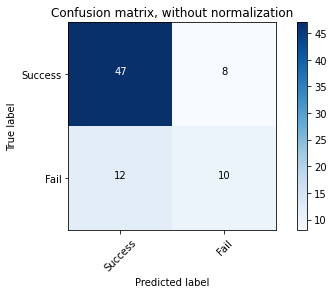

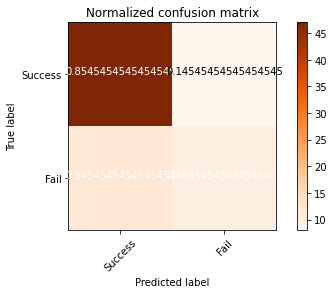

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_round_pred)
cm_plot_labels = ['Success','Fail']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, normalize=True, title='Normalized confusion matrix', cmap=plt.cm.Oranges)
print(classification_report(y_test, y_round_pred, target_names=cm_plot_labels))

plt.show()

## Model 100 employees

In [ ]:
# Copy the dataframe to new one, for create the models
df_Model =  db_companies_Encode_Model.copy()

# Split our preprocessed data into our features and target arrays
y_name = "more100_employees"
y = df_Model["more100_employees"].values
X = df_Model.drop(["more50_employees","more100_employees","soonicorn"],1).values

# Split the preprocessed data into a training and testing dataset. Config split (70-15-15)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, test_size=0.30))
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0]) # 65features
hidden_nodes_layer1 =  200 #Rule 3(lenfeatures)
hidden_nodes_layer2 = 130

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
#nn.summary()

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

#Early Stopping
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='accuracy', 
        patience=5,
        mode='max'
        ),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100, callbacks=my_callbacks, validation_data=((X_valid, y_valid)))

Epoch 1/100
12/12 [==============================] - 1s 18ms/step - loss: 0.4151 - accuracy: 0.8683 - val_loss: 245717.6094 - val_accuracy: 0.1711
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 0.2467 - accuracy: 0.8992 - val_loss: 810445.6250 - val_accuracy: 0.1316
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.1871 - accuracy: 0.9272 - val_loss: 1020055.3750 - val_accuracy: 0.1316
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.1522 - accuracy: 0.9412 - val_loss: 1142778.3750 - val_accuracy: 0.1316
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.1313 - accuracy: 0.9496 - val_loss: 1266296.3750 - val_accuracy: 0.1316
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.1139 - accuracy: 0.9552 - val_loss: 1175252.3750 - val_accuracy: 0.1316
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0988 - accuracy: 0.9608 - val_loss: 1341343.

### Report model evaluation

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# predict probabilities for test set
y_pred = nn.predict(X_test_scaled, verbose=0)
# round predict probabilities for test set
y_round_pred = (nn.predict(X_test_scaled) > 0.5).astype("int32")
# reduce to 1d array
y_pred = y_pred[:, 0]
y_round_pred = y_round_pred[:, 0]
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_round_pred)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_round_pred)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_round_pred)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_round_pred)
# kappa
kappa = cohen_kappa_score(y_test, y_round_pred)
# ROC AUC
auc = roc_auc_score(y_test, y_pred)

3/3 - 0s - loss: 0.9181 - accuracy: 0.8442 - 20ms/epoch - 7ms/step


In [ ]:
report(X=X, y=y, y_name=y_name, model=nn, X_train=X_train, y_train=y_train, X_valid=X_valid, y_valid=y_valid, X_test=X_test, y_test=y_test, model_loss=model_loss, accuracy=accuracy, precision=precision, recall=recall, f1=f1, kappa=kappa, auc=auc)


-----------
Unbalanced
X: 510
y: more100_employees
y: Counter({0: 437, 1: 73})
-----------
Train shape
X: (357, 87)
y : (357,)
Valid shape
X: (76, 87)
y : (76,)
Test shape
X: (77, 87)
y : (77,)

-----------

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 200)               17600     
                                                                 
 dense_7 (Dense)             (None, 130)               26130     
                                                                 
 dense_8 (Dense)             (None, 1)                 131       
                                                                 
Total params: 43,861
Trainable params: 43,861
Non-trainable params: 0
_________________________________________________________________

Loss: 0.9180989265441895
Accuracy: 0.844156
Precision: 0.666667
Recall: 0.588235
F1 score: 0.625000
Cohe

Confusion matrix, without normalization
[[55  5]
 [ 7 10]]
Normalized confusion matrix
[[0.92 0.08]
 [0.41 0.59]]
              precision    recall  f1-score   support

     Success       0.89      0.92      0.90        60
        Fail       0.67      0.59      0.62        17

    accuracy                           0.84        77
   macro avg       0.78      0.75      0.76        77
weighted avg       0.84      0.84      0.84        77



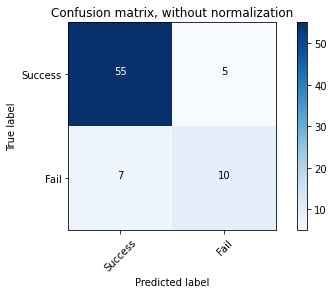

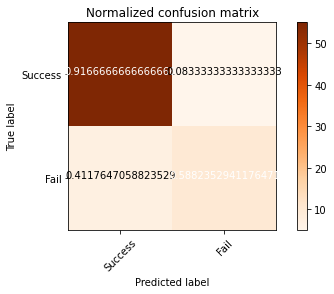

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_round_pred)
cm_plot_labels = ['Success','Fail']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, normalize=True, title='Normalized confusion matrix', cmap=plt.cm.Oranges)
print(classification_report(y_test, y_round_pred, target_names=cm_plot_labels))

plt.show()

## Model soonicorn

In [ ]:
# Copy the dataframe to new one, for create the models
df_Model =  db_companies_Encode_Model.copy()

# Split our preprocessed data into our features and target arrays
y_name = "soonicorn"
y = df_Model["soonicorn"].values
X = df_Model.drop(["more50_employees","more100_employees","soonicorn"],1).values

# Split the preprocessed data into a training and testing dataset. Config split (70-15-15)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, test_size=0.30))
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0]) # 65features
hidden_nodes_layer1 =  200 #Rule 3(lenfeatures)
hidden_nodes_layer2 = 130

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
#nn.summary()

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

#Early Stopping
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='accuracy', 
        patience=5,
        mode='max'
        ),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]


In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100, callbacks=my_callbacks, validation_data=((X_valid, y_valid)))

Epoch 1/100
12/12 [==============================] - 1s 19ms/step - loss: 0.3582 - accuracy: 0.8880 - val_loss: 2550975.5000 - val_accuracy: 0.9079
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 0.1601 - accuracy: 0.9468 - val_loss: 1837486.3750 - val_accuracy: 0.0921
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.1038 - accuracy: 0.9636 - val_loss: 1693726.3750 - val_accuracy: 0.0921
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0764 - accuracy: 0.9720 - val_loss: 1988804.6250 - val_accuracy: 0.0921
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0584 - accuracy: 0.9804 - val_loss: 2032018.1250 - val_accuracy: 0.0921
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0449 - accuracy: 0.9832 - val_loss: 2187687.0000 - val_accuracy: 0.0921
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0374 - accuracy: 0.9944 - val_loss: 234213

### Report model evaluation

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# predict probabilities for test set
y_pred = nn.predict(X_test_scaled, verbose=0)
# round predict probabilities for test set
y_round_pred = (nn.predict(X_test_scaled) > 0.5).astype("int32")
# reduce to 1d array
y_pred = y_pred[:, 0]
y_round_pred = y_round_pred[:, 0]
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_round_pred)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_round_pred)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_round_pred)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_round_pred)
# kappa
kappa = cohen_kappa_score(y_test, y_round_pred)
# ROC AUC
auc = roc_auc_score(y_test, y_pred)

3/3 - 0s - loss: 0.2675 - accuracy: 0.9221 - 18ms/epoch - 6ms/step


In [ ]:
report(X=X, y=y, y_name=y_name, model=nn, X_train=X_train, y_train=y_train, X_valid=X_valid, y_valid=y_valid, X_test=X_test, y_test=y_test, model_loss=model_loss, accuracy=accuracy, precision=precision, recall=recall, f1=f1, kappa=kappa, auc=auc)


-----------
Unbalanced
X: 510
y: soonicorn
y: Counter({0: 468, 1: 42})
-----------
Train shape
X: (357, 87)
y : (357,)
Valid shape
X: (76, 87)
y : (76,)
Test shape
X: (77, 87)
y : (77,)

-----------

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 200)               17600     
                                                                 
 dense_10 (Dense)            (None, 130)               26130     
                                                                 
 dense_11 (Dense)            (None, 1)                 131       
                                                                 
Total params: 43,861
Trainable params: 43,861
Non-trainable params: 0
_________________________________________________________________

Loss: 0.2675322890281677
Accuracy: 0.922078
Precision: 0.666667
Recall: 0.500000
F1 score: 0.571429
Cohens kappa

Confusion matrix, without normalization
[[67  2]
 [ 4  4]]
Normalized confusion matrix
[[0.97 0.03]
 [0.5  0.5 ]]
              precision    recall  f1-score   support

     Success       0.94      0.97      0.96        69
        Fail       0.67      0.50      0.57         8

    accuracy                           0.92        77
   macro avg       0.81      0.74      0.76        77
weighted avg       0.91      0.92      0.92        77



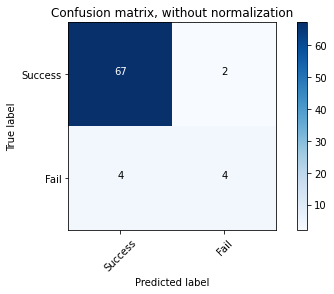

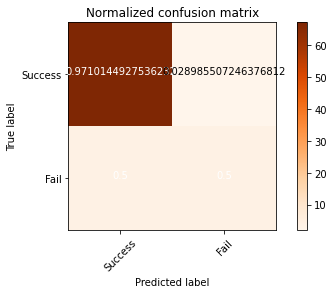

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_round_pred)
cm_plot_labels = ['Success','Fail']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, normalize=True, title='Normalized confusion matrix', cmap=plt.cm.Oranges)
print(classification_report(y_test, y_round_pred, target_names=cm_plot_labels))

plt.show()

# Balanced models

## OverSampling

### Model 50 employees

In [ ]:
# Copy the dataframe to new one, for create the models
df_Model =  db_companies_Encode_Model.copy()

# Split our preprocessed data into our features and target arrays
y_name = "more50_employees"
y = df_Model["more50_employees"].values
X = df_Model.drop(["more50_employees","more100_employees","soonicorn"],1).values

# Split the preprocessed data into a training and testing dataset. Config split (70-15-15)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, test_size=0.30))
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [ ]:
# Balanced data
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Counter
print(f'Unbalance: {Counter(y_train)}')
print('-----------')
print(f'Balance: {Counter(y_resampled)}')


Unbalance: Counter({0: 271, 1: 86})
-----------
Balance: Counter({0: 271, 1: 271})


In [ ]:
# undersampling. bajalos a 90

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_resampled)

# Scale the data
X_train_scaled = X_scaler.transform(X_resampled)
X_test_scaled = X_scaler.transform(X_test)

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0]) # 65features
hidden_nodes_layer1 =  200 #Rule 3(lenfeatures)
hidden_nodes_layer2 = 130

# Create the model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
#nn.summary()

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

#Early Stopping
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='accuracy', 
        patience=5,
        mode='max'
        ),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

accurancy parar... y hacer el crossvalidation.... cuando se hace los epoch.... cuando la validacion deiende ya esta obverfidato

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_resampled, epochs=100, callbacks=my_callbacks, validation_data=((X_valid, y_valid)))

Epoch 1/100
17/17 [==============================] - 1s 14ms/step - loss: 0.6065 - accuracy: 0.6513 - val_loss: 794681.5625 - val_accuracy: 0.2105
Epoch 2/100
17/17 [==============================] - 0s 6ms/step - loss: 0.4168 - accuracy: 0.8284 - val_loss: 1372596.1250 - val_accuracy: 0.2105
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.3387 - accuracy: 0.8690 - val_loss: 1803973.0000 - val_accuracy: 0.2105
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2833 - accuracy: 0.9041 - val_loss: 2317868.7500 - val_accuracy: 0.2105
Epoch 5/100
17/17 [==============================] - 0s 6ms/step - loss: 0.2328 - accuracy: 0.9299 - val_loss: 2796524.0000 - val_accuracy: 0.2105
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.1928 - accuracy: 0.9446 - val_loss: 3219448.5000 - val_accuracy: 0.2105
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.1597 - accuracy: 0.9668 - val_loss: 3620240

#### Report model evaluation

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# predict probabilities for test set
y_pred = nn.predict(X_test_scaled, verbose=0)
# round predict probabilities for test set
y_round_pred = (nn.predict(X_test_scaled) > 0.5).astype("int32")
# reduce to 1d array
y_pred = y_pred[:, 0]
y_round_pred = y_round_pred[:, 0]
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_round_pred)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_round_pred)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_round_pred)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_round_pred)
# kappa
kappa = cohen_kappa_score(y_test, y_round_pred)
# ROC AUC
auc = roc_auc_score(y_test, y_pred)

3/3 - 0s - loss: 1.7156 - accuracy: 0.7662 - 19ms/epoch - 6ms/step


In [ ]:
report(X=X, y=y, y_name=y_name, model=nn, X_train=X_train, y_train=y_train, X_valid=X_valid, y_valid=y_valid, X_test=X_test, y_test=y_test, model_loss=model_loss, accuracy=accuracy, precision=precision, recall=recall, f1=f1, kappa=kappa, auc=auc, balanced=True, y_resampled=y_resampled)


-----------
Balanced
X: 510
y: more50_employees
y: Counter({0: 391, 1: 119})
-----------
y_train
Unbalance: Counter({0: 271, 1: 86})
-----------
Balance: Counter({0: 271, 1: 271})
-----------
Train shape
X: (357, 87)
y : (357,)
Valid shape
X: (76, 87)
y : (76,)
Test shape
X: (77, 87)
y : (77,)

-----------

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 200)               17600     
                                                                 
 dense_13 (Dense)            (None, 130)               26130     
                                                                 
 dense_14 (Dense)            (None, 1)                 131       
                                                                 
Total params: 43,861
Trainable params: 43,861
Non-trainable params: 0
_________________________________________________________________

Los

In [ ]:
# no es tan bueo prediciendo los uno

Confusion matrix, without normalization
[[53  7]
 [11  6]]
Normalized confusion matrix
[[0.88 0.12]
 [0.65 0.35]]
              precision    recall  f1-score   support

     Success       0.83      0.88      0.85        60
        Fail       0.46      0.35      0.40        17

    accuracy                           0.77        77
   macro avg       0.64      0.62      0.63        77
weighted avg       0.75      0.77      0.75        77



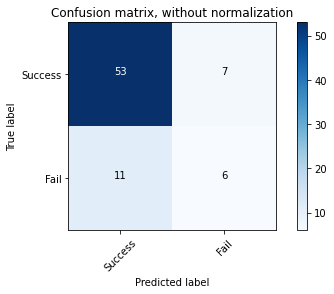

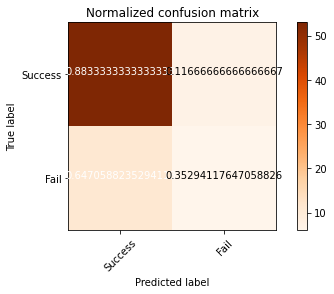

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_round_pred)
cm_plot_labels = ['Success','Fail']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, normalize=True, title='Normalized confusion matrix', cmap=plt.cm.Oranges)
print(classification_report(y_test, y_round_pred, target_names=cm_plot_labels))

plt.show()

### Model 100 employees

In [ ]:
# Copy the dataframe to new one, for create the models
df_Model =  db_companies_Encode_Model.copy()

# Split our preprocessed data into our features and target arrays
y_name = "more100_employees"
y = df_Model["more100_employees"].values
X = df_Model.drop(["more50_employees","more100_employees","soonicorn"],1).values

# Split the preprocessed data into a training and testing dataset. Config split (70-15-15)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, test_size=0.30))
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)


In [ ]:
# Balanced data
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Counter
print(f'Unbalance: {Counter(y_train)}')
print('-----------')
print(f'Balance: {Counter(y_resampled)}')

Unbalance: Counter({0: 309, 1: 48})
-----------
Balance: Counter({0: 309, 1: 309})


In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_resampled)

# Scale the data
X_train_scaled = X_scaler.transform(X_resampled)
X_test_scaled = X_scaler.transform(X_test)

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0]) # 65features
hidden_nodes_layer1 =  200 #Rule 3(lenfeatures)
hidden_nodes_layer2 = 130

# Create the model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
#nn.summary()

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

#Early Stopping
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='accuracy', 
        patience=5,
        mode='max'
        ),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_resampled, epochs=100, callbacks=my_callbacks, validation_data=((X_valid, y_valid)))

Epoch 1/100
20/20 [==============================] - 1s 11ms/step - loss: 0.4923 - accuracy: 0.7702 - val_loss: 1161360.0000 - val_accuracy: 0.1447
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2914 - accuracy: 0.8738 - val_loss: 2825787.2500 - val_accuracy: 0.1447
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1947 - accuracy: 0.9353 - val_loss: 3894967.2500 - val_accuracy: 0.1447
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1344 - accuracy: 0.9709 - val_loss: 5322556.0000 - val_accuracy: 0.1447
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0989 - accuracy: 0.9709 - val_loss: 6546546.5000 - val_accuracy: 0.1447
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0637 - accuracy: 0.9935 - val_loss: 7739679.0000 - val_accuracy: 0.1447
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0436 - accuracy: 0.9984 - val_loss: 902113

#### Report model evaluation

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# predict probabilities for test set
y_pred = nn.predict(X_test_scaled, verbose=0)
# round predict probabilities for test set
y_round_pred = (nn.predict(X_test_scaled) > 0.5).astype("int32")
# reduce to 1d array
y_pred = y_pred[:, 0]
y_round_pred = y_round_pred[:, 0]
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_round_pred)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_round_pred)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_round_pred)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_round_pred)
# kappa
kappa = cohen_kappa_score(y_test, y_round_pred)
# ROC AUC
auc = roc_auc_score(y_test, y_pred)

3/3 - 0s - loss: 1.0228 - accuracy: 0.8571 - 18ms/epoch - 6ms/step


In [ ]:
report(X=X, y=y, y_name=y_name, model=nn, X_train=X_train, y_train=y_train, X_valid=X_valid, y_valid=y_valid, X_test=X_test, y_test=y_test, model_loss=model_loss, accuracy=accuracy, precision=precision, recall=recall, f1=f1, kappa=kappa, auc=auc, balanced=True, y_resampled=y_resampled)


-----------
Balanced
X: 510
y: more100_employees
y: Counter({0: 437, 1: 73})
-----------
y_train
Unbalance: Counter({0: 309, 1: 48})
-----------
Balance: Counter({0: 309, 1: 309})
-----------
Train shape
X: (357, 87)
y : (357,)
Valid shape
X: (76, 87)
y : (76,)
Test shape
X: (77, 87)
y : (77,)

-----------

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 200)               17600     
                                                                 
 dense_16 (Dense)            (None, 130)               26130     
                                                                 
 dense_17 (Dense)            (None, 1)                 131       
                                                                 
Total params: 43,861
Trainable params: 43,861
Non-trainable params: 0
_________________________________________________________________

Los

Confusion matrix, without normalization
[[60  3]
 [ 8  6]]
Normalized confusion matrix
[[0.95 0.05]
 [0.57 0.43]]
              precision    recall  f1-score   support

     Success       0.88      0.95      0.92        63
        Fail       0.67      0.43      0.52        14

    accuracy                           0.86        77
   macro avg       0.77      0.69      0.72        77
weighted avg       0.84      0.86      0.84        77



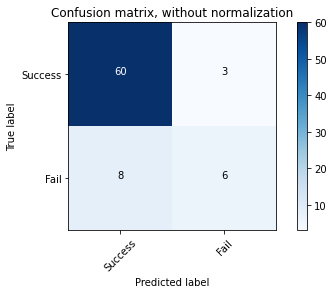

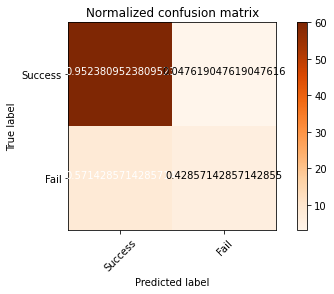

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_round_pred)
cm_plot_labels = ['Success','Fail']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, normalize=True, title='Normalized confusion matrix', cmap=plt.cm.Oranges)
print(classification_report(y_test, y_round_pred, target_names=cm_plot_labels))

plt.show()

### Model soonicorns

In [ ]:
# Copy the dataframe to new one, for create the models
df_Model =  db_companies_Encode_Model.copy()

# Split our preprocessed data into our features and target arrays
y_name = "soonicorn"
y = df_Model["soonicorn"].values
X = df_Model.drop(["more50_employees","more100_employees","soonicorn"],1).values

# Split the preprocessed data into a training and testing dataset. Config split (70-15-15)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, test_size=0.30))
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [ ]:
# Balanced data
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Counter
print(f'Unbalance: {Counter(y_train)}')
print('-----------')
print(f'Balance: {Counter(y_resampled)}')

Unbalance: Counter({0: 327, 1: 30})
-----------
Balance: Counter({0: 327, 1: 327})


In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_resampled)

# Scale the data
X_train_scaled = X_scaler.transform(X_resampled)
X_test_scaled = X_scaler.transform(X_test)

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0]) # 65features
hidden_nodes_layer1 =  200 #Rule 3(lenfeatures)
hidden_nodes_layer2 = 130

# Create the model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
#nn.summary()

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

#Early Stopping
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='accuracy', 
        patience=5,
        mode='max'
        ),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_resampled, epochs=100, callbacks=my_callbacks, validation_data=((X_valid, y_valid)))

Epoch 1/100
21/21 [==============================] - 1s 12ms/step - loss: 0.4163 - accuracy: 0.8196 - val_loss: 1015131.0625 - val_accuracy: 0.0658
Epoch 2/100
21/21 [==============================] - 0s 5ms/step - loss: 0.1979 - accuracy: 0.9159 - val_loss: 1848703.1250 - val_accuracy: 0.0658
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.1106 - accuracy: 0.9786 - val_loss: 2739808.0000 - val_accuracy: 0.0658
Epoch 4/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0621 - accuracy: 0.9908 - val_loss: 3578238.0000 - val_accuracy: 0.0658
Epoch 5/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0354 - accuracy: 0.9908 - val_loss: 4517018.0000 - val_accuracy: 0.0658
Epoch 6/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0261 - accuracy: 0.9954 - val_loss: 5054912.0000 - val_accuracy: 0.0658
Epoch 7/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0157 - accuracy: 0.9985 - val_loss: 565886

#### Report model evaluation

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# predict probabilities for test set
y_pred = nn.predict(X_test_scaled, verbose=0)
# round predict probabilities for test set
y_round_pred = (nn.predict(X_test_scaled) > 0.5).astype("int32")
# reduce to 1d array
y_pred = y_pred[:, 0]
y_round_pred = y_round_pred[:, 0]
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_round_pred)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_round_pred)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_round_pred)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_round_pred)
# kappa
kappa = cohen_kappa_score(y_test, y_round_pred)
# ROC AUC
auc = roc_auc_score(y_test, y_pred)

3/3 - 0s - loss: 0.0913 - accuracy: 0.9870 - 22ms/epoch - 7ms/step


In [ ]:
report(X=X, y=y, y_name=y_name, model=nn, X_train=X_train, y_train=y_train, X_valid=X_valid, y_valid=y_valid, X_test=X_test, y_test=y_test, model_loss=model_loss, accuracy=accuracy, precision=precision, recall=recall, f1=f1, kappa=kappa, auc=auc, balanced=True, y_resampled=y_resampled)


-----------
Balanced
X: 510
y: soonicorn
y: Counter({0: 468, 1: 42})
-----------
y_train
Unbalance: Counter({0: 327, 1: 30})
-----------
Balance: Counter({0: 327, 1: 327})
-----------
Train shape
X: (357, 87)
y : (357,)
Valid shape
X: (76, 87)
y : (76,)
Test shape
X: (77, 87)
y : (77,)

-----------

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 200)               17600     
                                                                 
 dense_19 (Dense)            (None, 130)               26130     
                                                                 
 dense_20 (Dense)            (None, 1)                 131       
                                                                 
Total params: 43,861
Trainable params: 43,861
Non-trainable params: 0
_________________________________________________________________

Loss: 0.091

Confusion matrix, without normalization
[[70  0]
 [ 1  6]]
Normalized confusion matrix
[[1.   0.  ]
 [0.14 0.86]]
              precision    recall  f1-score   support

     Success       0.99      1.00      0.99        70
        Fail       1.00      0.86      0.92         7

    accuracy                           0.99        77
   macro avg       0.99      0.93      0.96        77
weighted avg       0.99      0.99      0.99        77



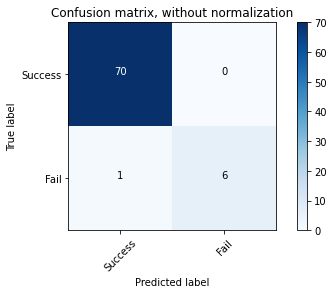

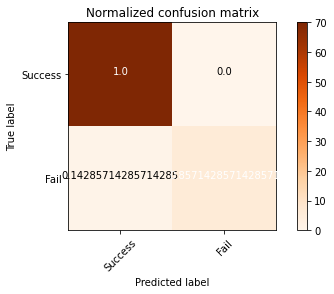

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_round_pred)
cm_plot_labels = ['Success','Fail']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, normalize=True, title='Normalized confusion matrix', cmap=plt.cm.Oranges)
print(classification_report(y_test, y_round_pred, target_names=cm_plot_labels))

plt.show()

## Undersampling

### Model 50 employees

In [ ]:
# Copy the dataframe to new one, for create the models
df_Model =  db_companies_Encode_Model.copy()

# Split our preprocessed data into our features and target arrays
y_name = "more50_employees"
y = df_Model["more50_employees"].values
X = df_Model.drop(["more50_employees","more100_employees","soonicorn"],1).values

# Split the preprocessed data into a training and testing dataset. Config split (70-15-15)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, test_size=0.30))
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [ ]:
# Balanced data
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Counter
print(f'Unbalance: {Counter(y_train)}')
print('-----------')
print(f'Balance: {Counter(y_resampled)}')


Unbalance: Counter({0: 277, 1: 80})
-----------
Balance: Counter({0: 80, 1: 80})


In [ ]:
# undersampling. bajalos a 90

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_resampled)

# Scale the data
X_train_scaled = X_scaler.transform(X_resampled)
X_test_scaled = X_scaler.transform(X_test)

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0]) # 65features
hidden_nodes_layer1 =  200 #Rule 3(lenfeatures)
hidden_nodes_layer2 = 130

# Create the model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
#nn.summary()

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

#Early Stopping
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='accuracy', 
        patience=5,
        mode='max'
        ),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_resampled, epochs=100, callbacks=my_callbacks, validation_data=((X_valid, y_valid)))

Epoch 1/100
5/5 [==============================] - 1s 51ms/step - loss: 0.6592 - accuracy: 0.5875 - val_loss: 279278.6562 - val_accuracy: 0.2500
Epoch 2/100
5/5 [==============================] - 0s 16ms/step - loss: 0.4804 - accuracy: 0.8125 - val_loss: 490026.1562 - val_accuracy: 0.2500
Epoch 3/100
5/5 [==============================] - 0s 15ms/step - loss: 0.3942 - accuracy: 0.8375 - val_loss: 642133.5000 - val_accuracy: 0.2500
Epoch 4/100
5/5 [==============================] - 0s 19ms/step - loss: 0.3448 - accuracy: 0.8438 - val_loss: 777633.1875 - val_accuracy: 0.2500
Epoch 5/100
5/5 [==============================] - 0s 16ms/step - loss: 0.3057 - accuracy: 0.8813 - val_loss: 945413.8750 - val_accuracy: 0.2500
Epoch 6/100
5/5 [==============================] - 0s 16ms/step - loss: 0.2667 - accuracy: 0.9250 - val_loss: 1089507.5000 - val_accuracy: 0.2500
Epoch 7/100
5/5 [==============================] - 0s 16ms/step - loss: 0.2383 - accuracy: 0.9375 - val_loss: 1202243.1250 - val_

#### Report model evaluation

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# predict probabilities for test set
y_pred = nn.predict(X_test_scaled, verbose=0)
# round predict probabilities for test set
y_round_pred = (nn.predict(X_test_scaled) > 0.5).astype("int32")
# reduce to 1d array
y_pred = y_pred[:, 0]
y_round_pred = y_round_pred[:, 0]
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_round_pred)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_round_pred)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_round_pred)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_round_pred)
# kappa
kappa = cohen_kappa_score(y_test, y_round_pred)
# ROC AUC
auc = roc_auc_score(y_test, y_pred)

3/3 - 0s - loss: 1.1860 - accuracy: 0.6753 - 19ms/epoch - 6ms/step


In [ ]:
report(X=X, y=y, y_name=y_name, model=nn, X_train=X_train, y_train=y_train, X_valid=X_valid, y_valid=y_valid, X_test=X_test, y_test=y_test, model_loss=model_loss, accuracy=accuracy, precision=precision, recall=recall, f1=f1, kappa=kappa, auc=auc, balanced=True, y_resampled=y_resampled)


-----------
Balanced
X: 510
y: more50_employees
y: Counter({0: 391, 1: 119})
-----------
y_train
Unbalance: Counter({0: 277, 1: 80})
-----------
Balance: Counter({0: 80, 1: 80})
-----------
Train shape
X: (357, 87)
y : (357,)
Valid shape
X: (76, 87)
y : (76,)
Test shape
X: (77, 87)
y : (77,)

-----------

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 200)               17600     
                                                                 
 dense_22 (Dense)            (None, 130)               26130     
                                                                 
 dense_23 (Dense)            (None, 1)                 131       
                                                                 
Total params: 43,861
Trainable params: 43,861
Non-trainable params: 0
_________________________________________________________________

Loss:

Confusion matrix, without normalization
[[37 20]
 [ 5 15]]
Normalized confusion matrix
[[0.65 0.35]
 [0.25 0.75]]
              precision    recall  f1-score   support

     Success       0.88      0.65      0.75        57
        Fail       0.43      0.75      0.55        20

    accuracy                           0.68        77
   macro avg       0.65      0.70      0.65        77
weighted avg       0.76      0.68      0.70        77



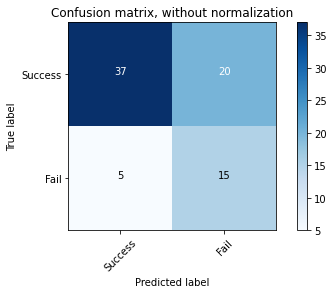

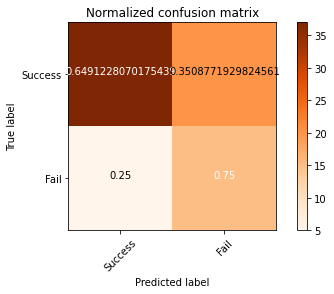

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_round_pred)
cm_plot_labels = ['Success','Fail']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, normalize=True, title='Normalized confusion matrix', cmap=plt.cm.Oranges)
print(classification_report(y_test, y_round_pred, target_names=cm_plot_labels))

plt.show()

### Model 100 employees

In [ ]:
# Copy the dataframe to new one, for create the models
df_Model =  db_companies_Encode_Model.copy()

# Split our preprocessed data into our features and target arrays
y_name = "more100_employees"
y = df_Model["more100_employees"].values
X = df_Model.drop(["more50_employees","more100_employees","soonicorn"],1).values

# Split the preprocessed data into a training and testing dataset. Config split (70-15-15)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, test_size=0.30))
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)


In [ ]:
# Balanced data
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Counter
print(f'Unbalance: {Counter(y_train)}')
print('-----------')
print(f'Balance: {Counter(y_resampled)}')

Unbalance: Counter({0: 308, 1: 49})
-----------
Balance: Counter({0: 49, 1: 49})


In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_resampled)

# Scale the data
X_train_scaled = X_scaler.transform(X_resampled)
X_test_scaled = X_scaler.transform(X_test)

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0]) # 65features
hidden_nodes_layer1 =  200 #Rule 3(lenfeatures)
hidden_nodes_layer2 = 130

# Create the model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
#nn.summary()

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

#Early Stopping
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='accuracy', 
        patience=5,
        mode='max'
        ),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_resampled, epochs=100, callbacks=my_callbacks, validation_data=((X_valid, y_valid)))

Epoch 1/100
4/4 [==============================] - 1s 59ms/step - loss: 0.7765 - accuracy: 0.3776 - val_loss: 613226.1250 - val_accuracy: 0.8289
Epoch 2/100
4/4 [==============================] - 0s 19ms/step - loss: 0.5865 - accuracy: 0.7653 - val_loss: 60125.0977 - val_accuracy: 0.3684
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 0.4967 - accuracy: 0.8367 - val_loss: 185400.8750 - val_accuracy: 0.1711
Epoch 4/100
4/4 [==============================] - 0s 14ms/step - loss: 0.4413 - accuracy: 0.8469 - val_loss: 301923.4688 - val_accuracy: 0.1711
Epoch 5/100
4/4 [==============================] - 0s 18ms/step - loss: 0.3955 - accuracy: 0.8571 - val_loss: 407543.3125 - val_accuracy: 0.1711
Epoch 6/100
4/4 [==============================] - 0s 19ms/step - loss: 0.3654 - accuracy: 0.8367 - val_loss: 511289.8438 - val_accuracy: 0.1711
Epoch 7/100
4/4 [==============================] - 0s 18ms/step - loss: 0.3398 - accuracy: 0.8469 - val_loss: 578439.8750 - val_acc

#### Report model evaluation

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# predict probabilities for test set
y_pred = nn.predict(X_test_scaled, verbose=0)
# round predict probabilities for test set
y_round_pred = (nn.predict(X_test_scaled) > 0.5).astype("int32")
# reduce to 1d array
y_pred = y_pred[:, 0]
y_round_pred = y_round_pred[:, 0]
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_round_pred)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_round_pred)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_round_pred)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_round_pred)
# kappa
kappa = cohen_kappa_score(y_test, y_round_pred)
# ROC AUC
auc = roc_auc_score(y_test, y_pred)

3/3 - 0s - loss: 0.5595 - accuracy: 0.7532 - 19ms/epoch - 6ms/step


In [ ]:
report(X=X, y=y, y_name=y_name, model=nn, X_train=X_train, y_train=y_train, X_valid=X_valid, y_valid=y_valid, X_test=X_test, y_test=y_test, model_loss=model_loss, accuracy=accuracy, precision=precision, recall=recall, f1=f1, kappa=kappa, auc=auc, balanced=True, y_resampled=y_resampled)


-----------
Balanced
X: 510
y: more100_employees
y: Counter({0: 437, 1: 73})
-----------
y_train
Unbalance: Counter({0: 308, 1: 49})
-----------
Balance: Counter({0: 49, 1: 49})
-----------
Train shape
X: (357, 87)
y : (357,)
Valid shape
X: (76, 87)
y : (76,)
Test shape
X: (77, 87)
y : (77,)

-----------

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 200)               17600     
                                                                 
 dense_25 (Dense)            (None, 130)               26130     
                                                                 
 dense_26 (Dense)            (None, 1)                 131       
                                                                 
Total params: 43,861
Trainable params: 43,861
Non-trainable params: 0
_________________________________________________________________

Loss:

Confusion matrix, without normalization
[[49 17]
 [ 2  9]]
Normalized confusion matrix
[[0.74 0.26]
 [0.18 0.82]]
              precision    recall  f1-score   support

     Success       0.96      0.74      0.84        66
        Fail       0.35      0.82      0.49        11

    accuracy                           0.75        77
   macro avg       0.65      0.78      0.66        77
weighted avg       0.87      0.75      0.79        77



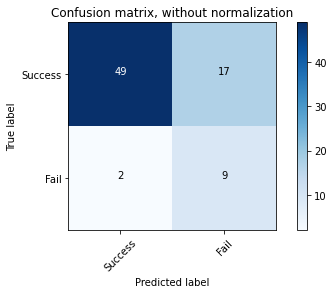

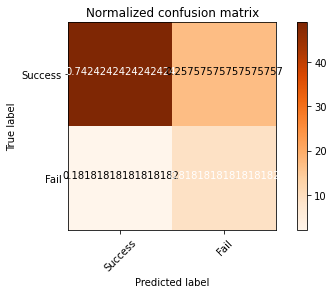

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_round_pred)
cm_plot_labels = ['Success','Fail']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, normalize=True, title='Normalized confusion matrix', cmap=plt.cm.Oranges)
print(classification_report(y_test, y_round_pred, target_names=cm_plot_labels))

plt.show()

### Model soonicorns

In [ ]:
# Copy the dataframe to new one, for create the models
df_Model =  db_companies_Encode_Model.copy()

# Split our preprocessed data into our features and target arrays
y_name = "soonicorn"
y = df_Model["soonicorn"].values
X = df_Model.drop(["more50_employees","more100_employees","soonicorn"],1).values

# Split the preprocessed data into a training and testing dataset. Config split (70-15-15)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, test_size=0.30))
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [ ]:
# Balanced data
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Counter
print(f'Unbalance: {Counter(y_train)}')
print('-----------')
print(f'Balance: {Counter(y_resampled)}')

Unbalance: Counter({0: 327, 1: 30})
-----------
Balance: Counter({0: 30, 1: 30})


In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_resampled)

# Scale the data
X_train_scaled = X_scaler.transform(X_resampled)
X_test_scaled = X_scaler.transform(X_test)

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0]) # 65features
hidden_nodes_layer1 =  200 #Rule 3(lenfeatures)
hidden_nodes_layer2 = 130

# Create the model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
#nn.summary()

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

#Early Stopping
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='accuracy', 
        patience=5,
        mode='max'
        ),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_resampled, epochs=100, callbacks=my_callbacks, validation_data=((X_valid, y_valid)))

Epoch 1/100
2/2 [==============================] - 1s 182ms/step - loss: 0.6684 - accuracy: 0.6000 - val_loss: 284709.0938 - val_accuracy: 0.0789
Epoch 2/100
2/2 [==============================] - 0s 32ms/step - loss: 0.5195 - accuracy: 0.8667 - val_loss: 467295.2500 - val_accuracy: 0.0789
Epoch 3/100
2/2 [==============================] - 0s 32ms/step - loss: 0.4240 - accuracy: 0.9167 - val_loss: 651990.1875 - val_accuracy: 0.0789
Epoch 4/100
2/2 [==============================] - 0s 47ms/step - loss: 0.3461 - accuracy: 0.9333 - val_loss: 856008.5000 - val_accuracy: 0.0789
Epoch 5/100
2/2 [==============================] - 0s 33ms/step - loss: 0.2919 - accuracy: 0.9500 - val_loss: 1057732.6250 - val_accuracy: 0.0789
Epoch 6/100
2/2 [==============================] - 0s 48ms/step - loss: 0.2431 - accuracy: 0.9500 - val_loss: 1242655.0000 - val_accuracy: 0.0789
Epoch 7/100
2/2 [==============================] - 0s 41ms/step - loss: 0.2043 - accuracy: 0.9500 - val_loss: 1442042.7500 - va

#### Report model evaluation

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# predict probabilities for test set
y_pred = nn.predict(X_test_scaled, verbose=0)
# round predict probabilities for test set
y_round_pred = (nn.predict(X_test_scaled) > 0.5).astype("int32")
# reduce to 1d array
y_pred = y_pred[:, 0]
y_round_pred = y_round_pred[:, 0]
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_round_pred)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_round_pred)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_round_pred)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_round_pred)
# kappa
kappa = cohen_kappa_score(y_test, y_round_pred)
# ROC AUC
auc = roc_auc_score(y_test, y_pred)

3/3 - 0s - loss: 0.3449 - accuracy: 0.8571 - 20ms/epoch - 7ms/step


In [ ]:
report(X=X, y=y, y_name=y_name, model=nn, X_train=X_train, y_train=y_train, X_valid=X_valid, y_valid=y_valid, X_test=X_test, y_test=y_test, model_loss=model_loss, accuracy=accuracy, precision=precision, recall=recall, f1=f1, kappa=kappa, auc=auc, balanced=True, y_resampled=y_resampled)


-----------
Balanced
X: 510
y: soonicorn
y: Counter({0: 468, 1: 42})
-----------
y_train
Unbalance: Counter({0: 327, 1: 30})
-----------
Balance: Counter({0: 30, 1: 30})
-----------
Train shape
X: (357, 87)
y : (357,)
Valid shape
X: (76, 87)
y : (76,)
Test shape
X: (77, 87)
y : (77,)

-----------

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 200)               17600     
                                                                 
 dense_28 (Dense)            (None, 130)               26130     
                                                                 
 dense_29 (Dense)            (None, 1)                 131       
                                                                 
Total params: 43,861
Trainable params: 43,861
Non-trainable params: 0
_________________________________________________________________

Loss: 0.34488

Confusion matrix, without normalization
[[62  9]
 [ 2  4]]
Normalized confusion matrix
[[0.87 0.13]
 [0.33 0.67]]
              precision    recall  f1-score   support

     Success       0.97      0.87      0.92        71
        Fail       0.31      0.67      0.42         6

    accuracy                           0.86        77
   macro avg       0.64      0.77      0.67        77
weighted avg       0.92      0.86      0.88        77



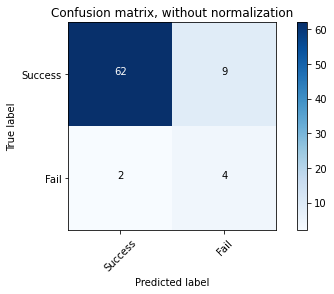

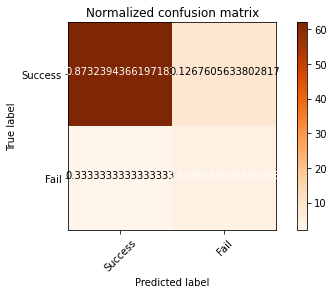

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_round_pred)
cm_plot_labels = ['Success','Fail']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, normalize=True, title='Normalized confusion matrix', cmap=plt.cm.Oranges)
print(classification_report(y_test, y_round_pred, target_names=cm_plot_labels))

plt.show()

## SMOTE

### Model 50 employees

In [ ]:
# Copy the dataframe to new one, for create the models
df_Model =  db_companies_Encode_Model.copy()

# Split our preprocessed data into our features and target arrays
y_name = "more50_employees"
y = df_Model["more50_employees"].values
X = df_Model.drop(["more50_employees","more100_employees","soonicorn"],1).values

# Split the preprocessed data into a training and testing dataset. Config split (70-15-15)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, test_size=0.30))
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [ ]:
# Balanced data
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1,sampling_strategy='auto').fit_resample(X_train, y_train)

# Counter
print(f'Unbalance: {Counter(y_train)}')
print('-----------')
print(f'Balance: {Counter(y_resampled)}')


Unbalance: Counter({0: 267, 1: 90})
-----------
Balance: Counter({0: 267, 1: 267})


In [ ]:
# undersampling. bajalos a 90

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_resampled)

# Scale the data
X_train_scaled = X_scaler.transform(X_resampled)
X_test_scaled = X_scaler.transform(X_test)

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0]) # 65features
hidden_nodes_layer1 =  200 #Rule 3(lenfeatures)
hidden_nodes_layer2 = 130

# Create the model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
#nn.summary()

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

#Early Stopping
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='accuracy', 
        patience=5,
        mode='max'
        ),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

accurancy parar... y hacer el crossvalidation.... cuando se hace los epoch.... cuando la validacion deiende ya esta obverfidato

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_resampled, epochs=100, callbacks=my_callbacks, validation_data=((X_valid, y_valid)))

Epoch 1/100
17/17 [==============================] - 1s 13ms/step - loss: 0.5974 - accuracy: 0.6629 - val_loss: 183719.8125 - val_accuracy: 0.2105
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.4294 - accuracy: 0.8165 - val_loss: 462806.5938 - val_accuracy: 0.2105
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.3515 - accuracy: 0.8539 - val_loss: 621537.5000 - val_accuracy: 0.2105
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2960 - accuracy: 0.8895 - val_loss: 860676.7500 - val_accuracy: 0.2105
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2600 - accuracy: 0.9064 - val_loss: 999714.9375 - val_accuracy: 0.2105
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2097 - accuracy: 0.9345 - val_loss: 1135904.3750 - val_accuracy: 0.2105
Epoch 7/100
17/17 [==============================] - 0s 6ms/step - loss: 0.1720 - accuracy: 0.9625 - val_loss: 1263578.125

#### Report model evaluation

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# predict probabilities for test set
y_pred = nn.predict(X_test_scaled, verbose=0)
# round predict probabilities for test set
y_round_pred = (nn.predict(X_test_scaled) > 0.5).astype("int32")
# reduce to 1d array
y_pred = y_pred[:, 0]
y_round_pred = y_round_pred[:, 0]
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_round_pred)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_round_pred)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_round_pred)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_round_pred)
# kappa
kappa = cohen_kappa_score(y_test, y_round_pred)
# ROC AUC
auc = roc_auc_score(y_test, y_pred)

3/3 - 0s - loss: 1.0640 - accuracy: 0.7532 - 19ms/epoch - 6ms/step


In [ ]:
report(X=X, y=y, y_name=y_name, model=nn, X_train=X_train, y_train=y_train, X_valid=X_valid, y_valid=y_valid, X_test=X_test, y_test=y_test, model_loss=model_loss, accuracy=accuracy, precision=precision, recall=recall, f1=f1, kappa=kappa, auc=auc, balanced=True, y_resampled=y_resampled)


-----------
Balanced
X: 510
y: more50_employees
y: Counter({0: 391, 1: 119})
-----------
y_train
Unbalance: Counter({0: 267, 1: 90})
-----------
Balance: Counter({0: 267, 1: 267})
-----------
Train shape
X: (357, 87)
y : (357,)
Valid shape
X: (76, 87)
y : (76,)
Test shape
X: (77, 87)
y : (77,)

-----------

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 200)               17600     
                                                                 
 dense_31 (Dense)            (None, 130)               26130     
                                                                 
 dense_32 (Dense)            (None, 1)                 131       
                                                                 
Total params: 43,861
Trainable params: 43,861
Non-trainable params: 0
_________________________________________________________________

Lo

In [ ]:
# no es tan bueo prediciendo los uno

Confusion matrix, without normalization
[[49 15]
 [ 4  9]]
Normalized confusion matrix
[[0.77 0.23]
 [0.31 0.69]]
              precision    recall  f1-score   support

     Success       0.92      0.77      0.84        64
        Fail       0.38      0.69      0.49        13

    accuracy                           0.75        77
   macro avg       0.65      0.73      0.66        77
weighted avg       0.83      0.75      0.78        77



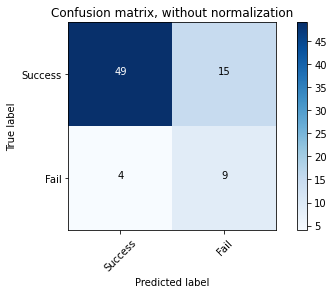

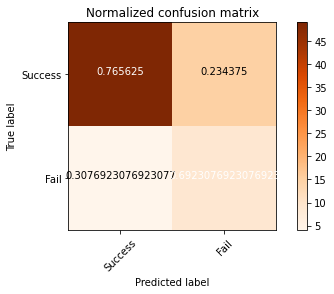

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_round_pred)
cm_plot_labels = ['Success','Fail']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, normalize=True, title='Normalized confusion matrix', cmap=plt.cm.Oranges)
print(classification_report(y_test, y_round_pred, target_names=cm_plot_labels))

plt.show()

### Model 100 employees

In [ ]:
# Copy the dataframe to new one, for create the models
df_Model =  db_companies_Encode_Model.copy()

# Split our preprocessed data into our features and target arrays
y_name = "more100_employees"
y = df_Model["more100_employees"].values
X = df_Model.drop(["more50_employees","more100_employees","soonicorn"],1).values

# Split the preprocessed data into a training and testing dataset. Config split (70-15-15)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, test_size=0.30))
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)


In [ ]:
# Balanced data
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1,sampling_strategy='auto').fit_resample(X_train, y_train)

# Counter
print(f'Unbalance: {Counter(y_train)}')
print('-----------')
print(f'Balance: {Counter(y_resampled)}')

Unbalance: Counter({0: 315, 1: 42})
-----------
Balance: Counter({0: 315, 1: 315})


In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_resampled)

# Scale the data
X_train_scaled = X_scaler.transform(X_resampled)
X_test_scaled = X_scaler.transform(X_test)

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0]) # 65features
hidden_nodes_layer1 =  200 #Rule 3(lenfeatures)
hidden_nodes_layer2 = 130

# Create the model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
#nn.summary()

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

#Early Stopping
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='accuracy', 
        patience=5,
        mode='max'
        ),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_resampled, epochs=100, callbacks=my_callbacks, validation_data=((X_valid, y_valid)))

Epoch 1/100
20/20 [==============================] - 1s 13ms/step - loss: 0.4985 - accuracy: 0.7587 - val_loss: 578254.5000 - val_accuracy: 0.1974
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2616 - accuracy: 0.9000 - val_loss: 964452.9375 - val_accuracy: 0.1974
Epoch 3/100
20/20 [==============================] - 0s 6ms/step - loss: 0.1780 - accuracy: 0.9397 - val_loss: 1169054.8750 - val_accuracy: 0.1974
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.1300 - accuracy: 0.9603 - val_loss: 1447749.6250 - val_accuracy: 0.1974
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1017 - accuracy: 0.9730 - val_loss: 1503321.6250 - val_accuracy: 0.1974
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0829 - accuracy: 0.9778 - val_loss: 1669428.5000 - val_accuracy: 0.1974
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.0673 - accuracy: 0.9857 - val_loss: 1746994.

#### Report model evaluation

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# predict probabilities for test set
y_pred = nn.predict(X_test_scaled, verbose=0)
# round predict probabilities for test set
y_round_pred = (nn.predict(X_test_scaled) > 0.5).astype("int32")
# reduce to 1d array
y_pred = y_pred[:, 0]
y_round_pred = y_round_pred[:, 0]
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_round_pred)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_round_pred)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_round_pred)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_round_pred)
# kappa
kappa = cohen_kappa_score(y_test, y_round_pred)
# ROC AUC
auc = roc_auc_score(y_test, y_pred)

3/3 - 0s - loss: 1.3318 - accuracy: 0.7922 - 18ms/epoch - 6ms/step


In [ ]:
report(X=X, y=y, y_name=y_name, model=nn, X_train=X_train, y_train=y_train, X_valid=X_valid, y_valid=y_valid, X_test=X_test, y_test=y_test, model_loss=model_loss, accuracy=accuracy, precision=precision, recall=recall, f1=f1, kappa=kappa, auc=auc, balanced=True, y_resampled=y_resampled)


-----------
Balanced
X: 510
y: more100_employees
y: Counter({0: 437, 1: 73})
-----------
y_train
Unbalance: Counter({0: 315, 1: 42})
-----------
Balance: Counter({0: 315, 1: 315})
-----------
Train shape
X: (357, 87)
y : (357,)
Valid shape
X: (76, 87)
y : (76,)
Test shape
X: (77, 87)
y : (77,)

-----------

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 200)               17600     
                                                                 
 dense_34 (Dense)            (None, 130)               26130     
                                                                 
 dense_35 (Dense)            (None, 1)                 131       
                                                                 
Total params: 43,861
Trainable params: 43,861
Non-trainable params: 0
_________________________________________________________________

Lo

Confusion matrix, without normalization
[[55  6]
 [10  6]]
Normalized confusion matrix
[[0.9  0.1 ]
 [0.62 0.38]]
              precision    recall  f1-score   support

     Success       0.85      0.90      0.87        61
        Fail       0.50      0.38      0.43        16

    accuracy                           0.79        77
   macro avg       0.67      0.64      0.65        77
weighted avg       0.77      0.79      0.78        77



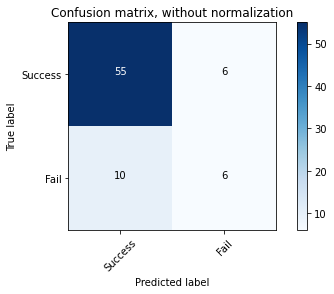

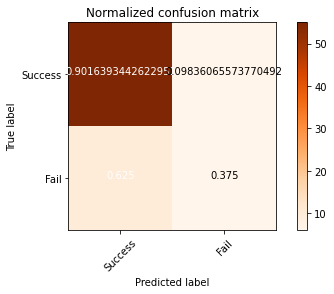

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_round_pred)
cm_plot_labels = ['Success','Fail']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, normalize=True, title='Normalized confusion matrix', cmap=plt.cm.Oranges)
print(classification_report(y_test, y_round_pred, target_names=cm_plot_labels))

plt.show()

### Model soonicorns

In [ ]:
# Copy the dataframe to new one, for create the models
df_Model =  db_companies_Encode_Model.copy()

# Split our preprocessed data into our features and target arrays
y_name = "soonicorn"
y = df_Model["soonicorn"].values
X = df_Model.drop(["more50_employees","more100_employees","soonicorn"],1).values

# Split the preprocessed data into a training and testing dataset. Config split (70-15-15)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, test_size=0.30))
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [ ]:
# Balanced data
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1,sampling_strategy='auto').fit_resample(X_train, y_train)

# Counter
print(f'Unbalance: {Counter(y_train)}')
print('-----------')
print(f'Balance: {Counter(y_resampled)}')

Unbalance: Counter({0: 326, 1: 31})
-----------
Balance: Counter({0: 326, 1: 326})


In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_resampled)

# Scale the data
X_train_scaled = X_scaler.transform(X_resampled)
X_test_scaled = X_scaler.transform(X_test)

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0]) # 65features
hidden_nodes_layer1 =  200 #Rule 3(lenfeatures)
hidden_nodes_layer2 = 130

# Create the model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
#nn.summary()

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

#Early Stopping
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='accuracy', 
        patience=5,
        mode='max'
        ),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_resampled, epochs=100, callbacks=my_callbacks, validation_data=((X_valid, y_valid)))

Epoch 1/100
21/21 [==============================] - 1s 11ms/step - loss: 0.4614 - accuracy: 0.7623 - val_loss: 2333020.5000 - val_accuracy: 0.0658
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 0.1937 - accuracy: 0.9064 - val_loss: 3861937.2500 - val_accuracy: 0.0658
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.1130 - accuracy: 0.9663 - val_loss: 5435436.0000 - val_accuracy: 0.0658
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0692 - accuracy: 0.9847 - val_loss: 6708700.0000 - val_accuracy: 0.0658
Epoch 5/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0468 - accuracy: 0.9908 - val_loss: 8038401.5000 - val_accuracy: 0.0658
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0316 - accuracy: 0.9939 - val_loss: 9117976.0000 - val_accuracy: 0.0658
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0237 - accuracy: 0.9939 - val_loss: 100468

#### Report model evaluation

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# predict probabilities for test set
y_pred = nn.predict(X_test_scaled, verbose=0)
# round predict probabilities for test set
y_round_pred = (nn.predict(X_test_scaled) > 0.5).astype("int32")
# reduce to 1d array
y_pred = y_pred[:, 0]
y_round_pred = y_round_pred[:, 0]
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_round_pred)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_round_pred)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_round_pred)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_round_pred)
# kappa
kappa = cohen_kappa_score(y_test, y_round_pred)
# ROC AUC
auc = roc_auc_score(y_test, y_pred)

3/3 - 0s - loss: 0.0210 - accuracy: 0.9870 - 20ms/epoch - 7ms/step


In [ ]:
report(X=X, y=y, y_name=y_name, model=nn, X_train=X_train, y_train=y_train, X_valid=X_valid, y_valid=y_valid, X_test=X_test, y_test=y_test, model_loss=model_loss, accuracy=accuracy, precision=precision, recall=recall, f1=f1, kappa=kappa, auc=auc, balanced=True, y_resampled=y_resampled)


-----------
Balanced
X: 510
y: soonicorn
y: Counter({0: 468, 1: 42})
-----------
y_train
Unbalance: Counter({0: 326, 1: 31})
-----------
Balance: Counter({0: 326, 1: 326})
-----------
Train shape
X: (357, 87)
y : (357,)
Valid shape
X: (76, 87)
y : (76,)
Test shape
X: (77, 87)
y : (77,)

-----------

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 200)               17600     
                                                                 
 dense_37 (Dense)            (None, 130)               26130     
                                                                 
 dense_38 (Dense)            (None, 1)                 131       
                                                                 
Total params: 43,861
Trainable params: 43,861
Non-trainable params: 0
_________________________________________________________________

Loss: 0.02

Confusion matrix, without normalization
[[70  1]
 [ 0  6]]
Normalized confusion matrix
[[0.99 0.01]
 [0.   1.  ]]
              precision    recall  f1-score   support

     Success       1.00      0.99      0.99        71
        Fail       0.86      1.00      0.92         6

    accuracy                           0.99        77
   macro avg       0.93      0.99      0.96        77
weighted avg       0.99      0.99      0.99        77



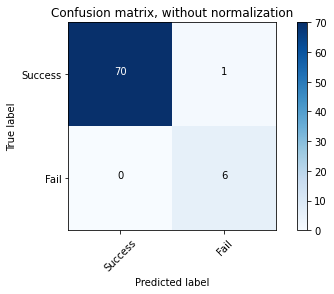

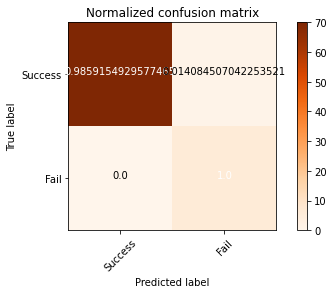

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_round_pred)
cm_plot_labels = ['Success','Fail']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, normalize=True, title='Normalized confusion matrix', cmap=plt.cm.Oranges)
print(classification_report(y_test, y_round_pred, target_names=cm_plot_labels))

plt.show()

# Signout code

In [ ]:
private void signOut() {
    mGoogleSignInClient.signOut()
            .addOnCompleteListener(this, new OnCompleteListener<Void>() {
                @Override
                public void onComplete(@NonNull Task<Void> task) {
                    // ...
                }
            });

signOut()

File


In [ ]:
from google.colab import files

with open('/content/drive/MyDrive/Final_project/Second_Deliverable/key_config.txt', "r") as file:
    FileasList = file.readlines()
    username = FileasList[0]
    password = FileasList[1]

    new_line = []
    # Loop through the file
    for i in FileasList:
        # Get rid of any new lines ("enter")
        i = i.replace("\n", "")
        # Add the cleaned data to the new_line list
        new_line.append(i)
    # Set the username to be the first object
    username = new_line[0]
    # Set the password to be the second object
    password = new_line[1]

In [ ]:
from sklearn.metrics import confusion_matrix

predictions = nn.predict(X_test_scaled)
y_pred = (predictions > 0.5)
cm = confusion_matrix(y_test,y_pred)
print(cm)